# Data Science Internship at Widhya

## Mission: Uber Data Analysis

#### Importing Required Liberaries

In [1]:
import pandas as pd
import numpy as np
import glob
from matplotlib import cm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))
from sklearn.metrics import mean_squared_error
from math import sqrt


from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model


Bad key "text.kerning_factor" on line 4 in
C:\Users\HRISHIKESH\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
C:\Users\HRISHIKESH\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.
C:\Users\HRISHIKESH\Anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.2) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


#### Reading dataset folder and appending csv files

In [2]:
datasets=glob.glob(r'Uber-dataset'+'\*.csv')

In [3]:
list=[]
for name in datasets:
    d=pd.read_csv(name)
    list.append(d)
df=pd.concat(list,axis=0,ignore_index=True)

#### Preview of Dataset

In [4]:
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [5]:
df.tail()

,Date/Time,Lat,Lon,Base
4534322,9/30/2014 22:57:00,40.7668,-73.9845,B02764
4534323,9/30/2014 22:57:00,40.6911,-74.1773,B02764
4534324,9/30/2014 22:58:00,40.8519,-73.9319,B02764
4534325,9/30/2014 22:58:00,40.7081,-74.0066,B02764
4534326,9/30/2014 22:58:00,40.7140,-73.9496,B02764


#### Dataset Information:
+ Date/Time : The date and time of the Uber pickup.
+ Lat : The latitude of the Uber pickup
+ Lon : The longitude of the Uber pickup
+ Base : The TLC base company code affiliated with the Uber pickup

#### Shape of Data

In [6]:
df.shape

(4534327, 4)

### Feature Engineering

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 138.4+ MB


#### Checking for null values

In [8]:
df.isna().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [9]:
df.describe()

,Lat,Lon
count,4.534327e+06,4.534327e+06
mean,4.073926e+01,-7.397302e+01
std,3.994991e-02,5.726670e-02
min,3.965690e+01,-7.492900e+01
25%,4.072110e+01,-7.399650e+01
50%,4.074220e+01,-7.398340e+01
75%,4.076100e+01,-7.396530e+01
max,4.211660e+01,-7.206660e+01


#### Spliting Dataset and five more columns: Date, Month, Only_date, Days of week , and Hour

In [10]:
df.Timestamp = pd.to_datetime(df['Date/Time'],format='%m/%d/%Y %H:%M:%S') 

C:\Users\HRISHIKESH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [11]:
df['date_only'] = df.Timestamp.dt.date
df['date'] = df.Timestamp
df['month'] = df.Timestamp.dt.month
df['dow_num'] = df.Timestamp.dt.dayofweek
df['dow_name'] = df.Timestamp.dt.day_name()
df['month_day_num'] = df.Timestamp.dt.day
df['hours'] = df.Timestamp.dt.hour

df= df.drop(columns = ['Lat','Lon'])

#### Preview after data-preprocessing

In [12]:
df.head()

,Date/Time,Base,date_only,date,month,dow_num,dow_name,month_day_num,hours
0,4/1/2014 0:11:00,B02512,2014-04-01,2014-04-01 00:11:00,4,1,Tuesday,1,0
1,4/1/2014 0:17:00,B02512,2014-04-01,2014-04-01 00:17:00,4,1,Tuesday,1,0
2,4/1/2014 0:21:00,B02512,2014-04-01,2014-04-01 00:21:00,4,1,Tuesday,1,0
3,4/1/2014 0:28:00,B02512,2014-04-01,2014-04-01 00:28:00,4,1,Tuesday,1,0
4,4/1/2014 0:33:00,B02512,2014-04-01,2014-04-01 00:33:00,4,1,Tuesday,1,0


In [13]:
df.tail()

,Date/Time,Base,date_only,date,month,dow_num,dow_name,month_day_num,hours
4534322,9/30/2014 22:57:00,B02764,2014-09-30,2014-09-30 22:57:00,9,1,Tuesday,30,22
4534323,9/30/2014 22:57:00,B02764,2014-09-30,2014-09-30 22:57:00,9,1,Tuesday,30,22
4534324,9/30/2014 22:58:00,B02764,2014-09-30,2014-09-30 22:58:00,9,1,Tuesday,30,22
4534325,9/30/2014 22:58:00,B02764,2014-09-30,2014-09-30 22:58:00,9,1,Tuesday,30,22
4534326,9/30/2014 22:58:00,B02764,2014-09-30,2014-09-30 22:58:00,9,1,Tuesday,30,22


#### Feature Engineering 1

In [14]:
df['dow_name'].value_counts()

Thursday     755145
Friday       741139
Wednesday    696488
Tuesday      663789
Saturday     646114
Monday       541472
Sunday       490180
Name: dow_name, dtype: int64

In [15]:
df['dow_num'].value_counts()

3    755145
4    741139
2    696488
1    663789
5    646114
0    541472
6    490180
Name: dow_num, dtype: int64

In [16]:
df['month'].value_counts()

9    1028136
8     829275
7     796121
6     663844
5     652435
4     564516
Name: month, dtype: int64

In [17]:
df['Base'].value_counts()

B02617    1458853
B02598    1393113
B02682    1212789
B02764     263899
B02512     205673
Name: Base, dtype: int64

#### Lowercasing all the column names

In [18]:
df.columns = df.columns.str.lower()

In [19]:
df.head()

,date/time,base,date_only,date,month,dow_num,dow_name,month_day_num,hours
0,4/1/2014 0:11:00,B02512,2014-04-01,2014-04-01 00:11:00,4,1,Tuesday,1,0
1,4/1/2014 0:17:00,B02512,2014-04-01,2014-04-01 00:17:00,4,1,Tuesday,1,0
2,4/1/2014 0:21:00,B02512,2014-04-01,2014-04-01 00:21:00,4,1,Tuesday,1,0
3,4/1/2014 0:28:00,B02512,2014-04-01,2014-04-01 00:28:00,4,1,Tuesday,1,0
4,4/1/2014 0:33:00,B02512,2014-04-01,2014-04-01 00:33:00,4,1,Tuesday,1,0


In [20]:
df.groupby('hours')['hours'].count().sort_values(ascending=False)

hours
17    336190
18    324679
16    313400
19    294513
20    284604
21    281460
15    275466
22    241858
14    230625
13    195877
7     193094
8     190504
12    170452
23    169190
11    165703
9     159967
10    159148
6     143213
0     103836
5      83939
1      67227
4      55230
3      48287
2      45865
Name: hours, dtype: int64

#### Peak Days

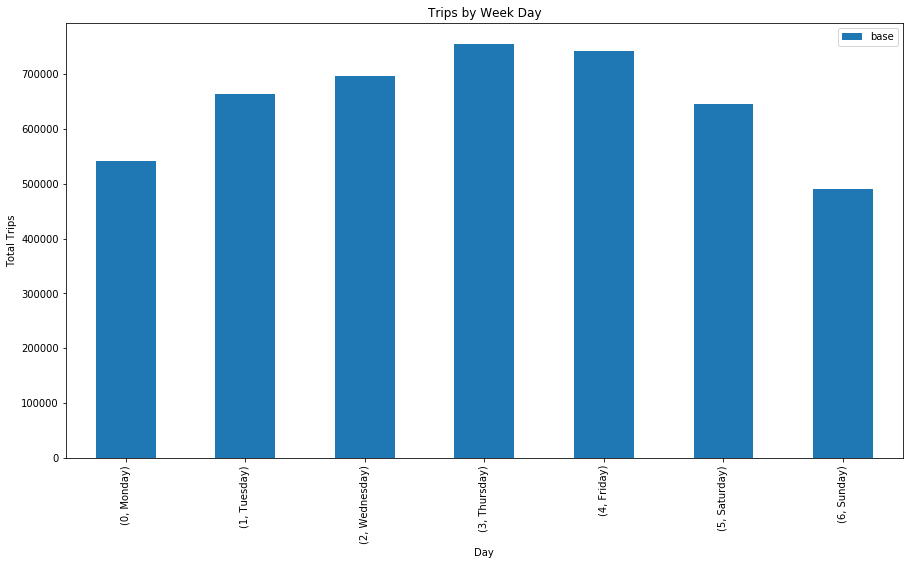

In [21]:
df.groupby(pd.Grouper(key='dow_name')).count()

uber_weekdays = df.pivot_table(index=['dow_num','dow_name'],values='base', aggfunc='count')
uber_weekdays.plot(kind='bar', figsize=(15,8))
plt.ylabel('Total Trips')
plt.xlabel('Day')
plt.title('Trips by Week Day');

>Here we can notice that the larest number of uber pickups were done on Thurdays, Fridays and Wednesdays

#### Analysing peek hours

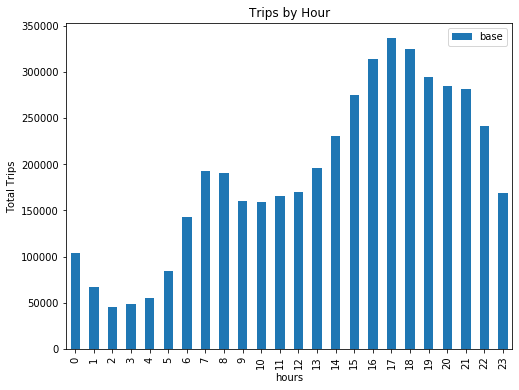

In [22]:
uber_hour = df.pivot_table(index=['hours'], values='base', aggfunc='count')
uber_hour.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Trips')
plt.title('Trips by Hour');

>From here we can notice that peak hours of booking a cab are in between 16 to 20 hour that means in evening from 4pm to 8pm. We can also see that more cabs are booked in evenings compared to morning

#### Base

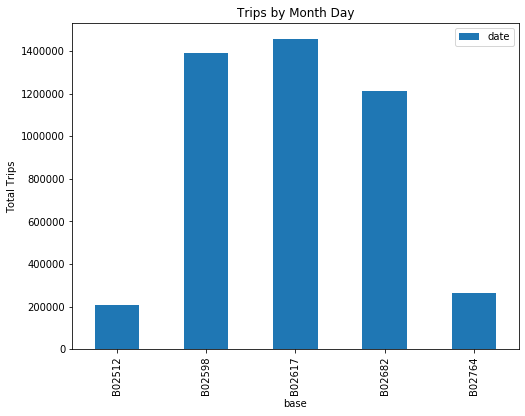

In [23]:
df.groupby(pd.Grouper(key='base')).count()

uber_monthdays = df.pivot_table(index=['base'], values='date' ,
                                  aggfunc='count')
uber_monthdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Trips')
plt.title('Trips by Month Day');

>Here we can notice that Base B02617 provided most cabs. Closely followed by B02598

#### Splitting the dataset

>As per requirements and as we having a very large dataset of 4.5 million+ values. I have used 90-10 split

In [24]:
df= df.drop(columns = ['month','dow_num','base', 'dow_name', 'month_day_num', 'hours'])

In [25]:
df.head()

,date/time,date_only,date
0,4/1/2014 0:11:00,2014-04-01,2014-04-01 00:11:00
1,4/1/2014 0:17:00,2014-04-01,2014-04-01 00:17:00
2,4/1/2014 0:21:00,2014-04-01,2014-04-01 00:21:00
3,4/1/2014 0:28:00,2014-04-01,2014-04-01 00:28:00
4,4/1/2014 0:33:00,2014-04-01,2014-04-01 00:33:00


### Time Series Forcasting


>The df uber_dates is the grouping of the above dataset on daily basis with timestamp of only date. This datadeame is used to for univariate Time Series Forecasting.

In [26]:
uber_dates=df.groupby(pd.Grouper(key='date_only')).count()
uber_dates= uber_dates.drop(columns = ['date'])
print(uber_dates.info())

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 2014-04-01 to 2014-09-30
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   date/time  183 non-null    int64
dtypes: int64(1)
memory usage: 2.9+ KB
None


In [27]:
uber_dates_d= uber_dates.drop(columns = ['date/time'])
uber_dates_d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 2014-04-01 to 2014-09-30
Empty DataFrame

#### calculating 90% of data

In [28]:
round(0.9*len(uber_dates))

165

#### Data Splitting

In [29]:
train_ts = uber_dates[:][:165]                     #split is 90-10
test_ts = uber_dates[:][166:]
test_ts_d = uber_dates_d[:][166:]

#### Preview of training and testing dataset

In [30]:
train_ts.tail()

,date/time
date_only,
2014-09-08,30360
2014-09-09,34560
2014-09-10,35910
2014-09-11,36439
2014-09-12,39540


In [31]:
test_ts.head()

,date/time
date_only,
2014-09-14,28122
2014-09-15,29454
2014-09-16,36092
2014-09-17,35531
2014-09-18,40274


#### Monthwise Trips

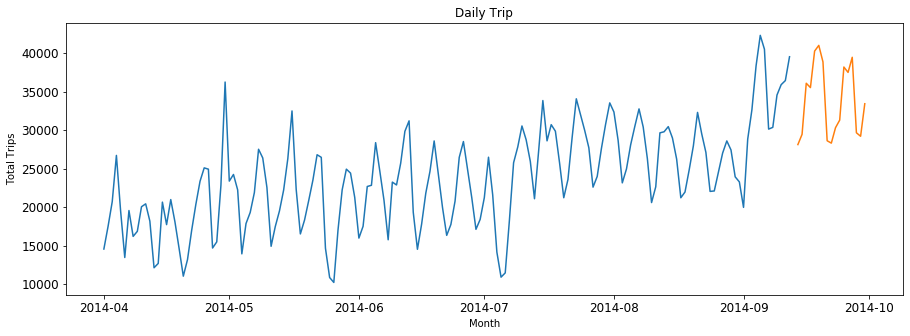

In [32]:
train_ts['date/time'].plot(kind='line',figsize=(15,8), title= 'Daily Trip', fontsize=12)
test_ts['date/time'].plot(figsize=(15,5), title= 'Daily Trip', fontsize=12)
plt.ylabel('Total Trips')
plt.xlabel('Month')
plt.show()

### Holt’s Winter seasonal method

In [33]:
hat_avg = test_ts.copy()
fit1 = ExponentialSmoothing(np.asarray(train_ts['date/time']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
hat_avg['Holt_Winter'] = fit1.forecast(len(test_ts))

C:\Users\HRISHIKESH\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


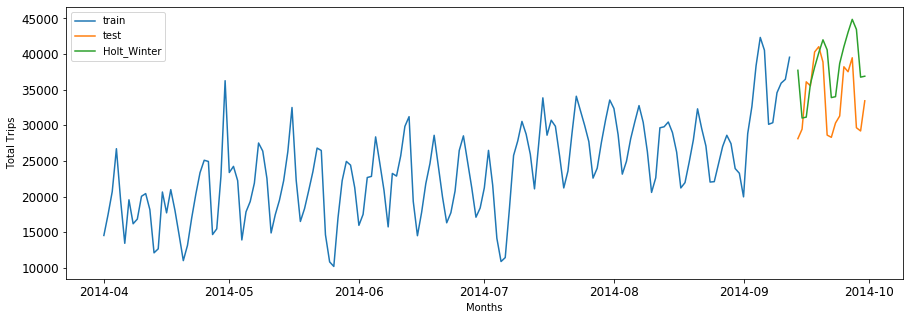

In [34]:
plt.figure(figsize=(15,5))
train_ts['date/time'].plot(kind='line',figsize=(15,8),fontsize=12,label='train')
test_ts['date/time'].plot(figsize=(15,5),fontsize=12,label='test')
plt.plot(hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.ylabel('Total Trips')
plt.xlabel('Months')
plt.show()

This model gives best accuracy so far and we can notice from the above plot that the predicted **Holt winter graph** is almost overlapping with the actual test dataset available to us

#### Holt’s Linear Trend method

<Figure size 1600x800 with 0 Axes>

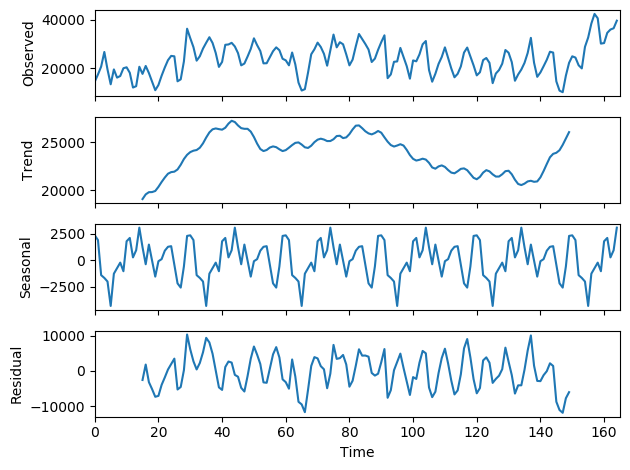

In [35]:
plt.style.use('default')
plt.figure(figsize = (16,8))
sm.tsa.seasonal_decompose(train_ts['date/time'].values,freq=30).plot()
result = sm.tsa.stattools.adfuller(uber_dates['date/time'])
plt.show()

#### Hot_linear_Model Prediction

In [36]:
hat_avg_1 = test_ts.copy()

fit1 = Holt(np.asarray(train_ts['date/time'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
hat_avg_1['Holt_linear'] = fit1.forecast(len(test_ts))

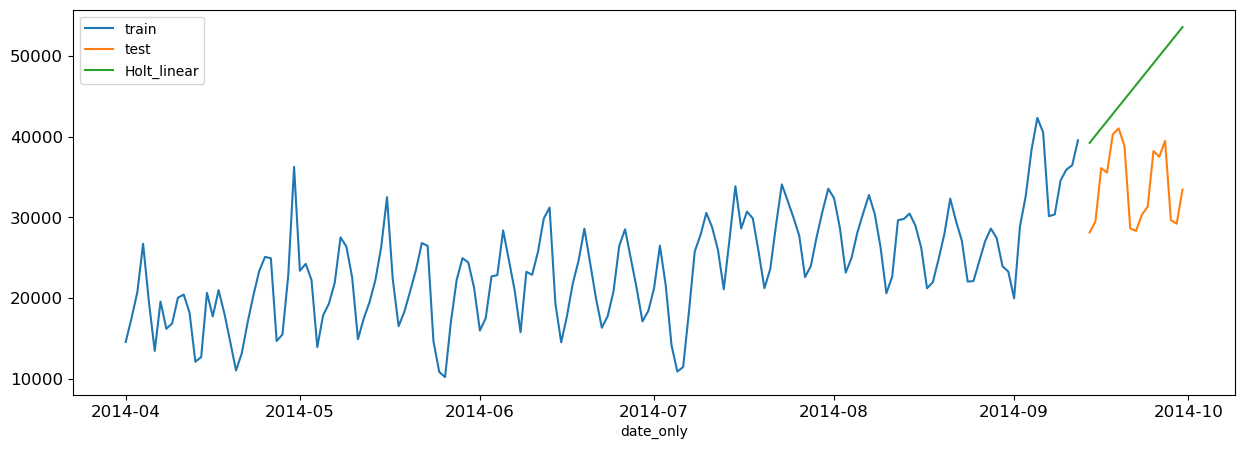

In [37]:
plt.figure(figsize=(16,5))
train_ts['date/time'].plot(kind='line',figsize=(15,8),fontsize=12,label='train')
test_ts['date/time'].plot(figsize=(15,5),fontsize=12,label='test')
plt.plot(hat_avg_1['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

### ARIMA

In [38]:
from matplotlib.pylab import rcParams

#### Rolling Mean and STD

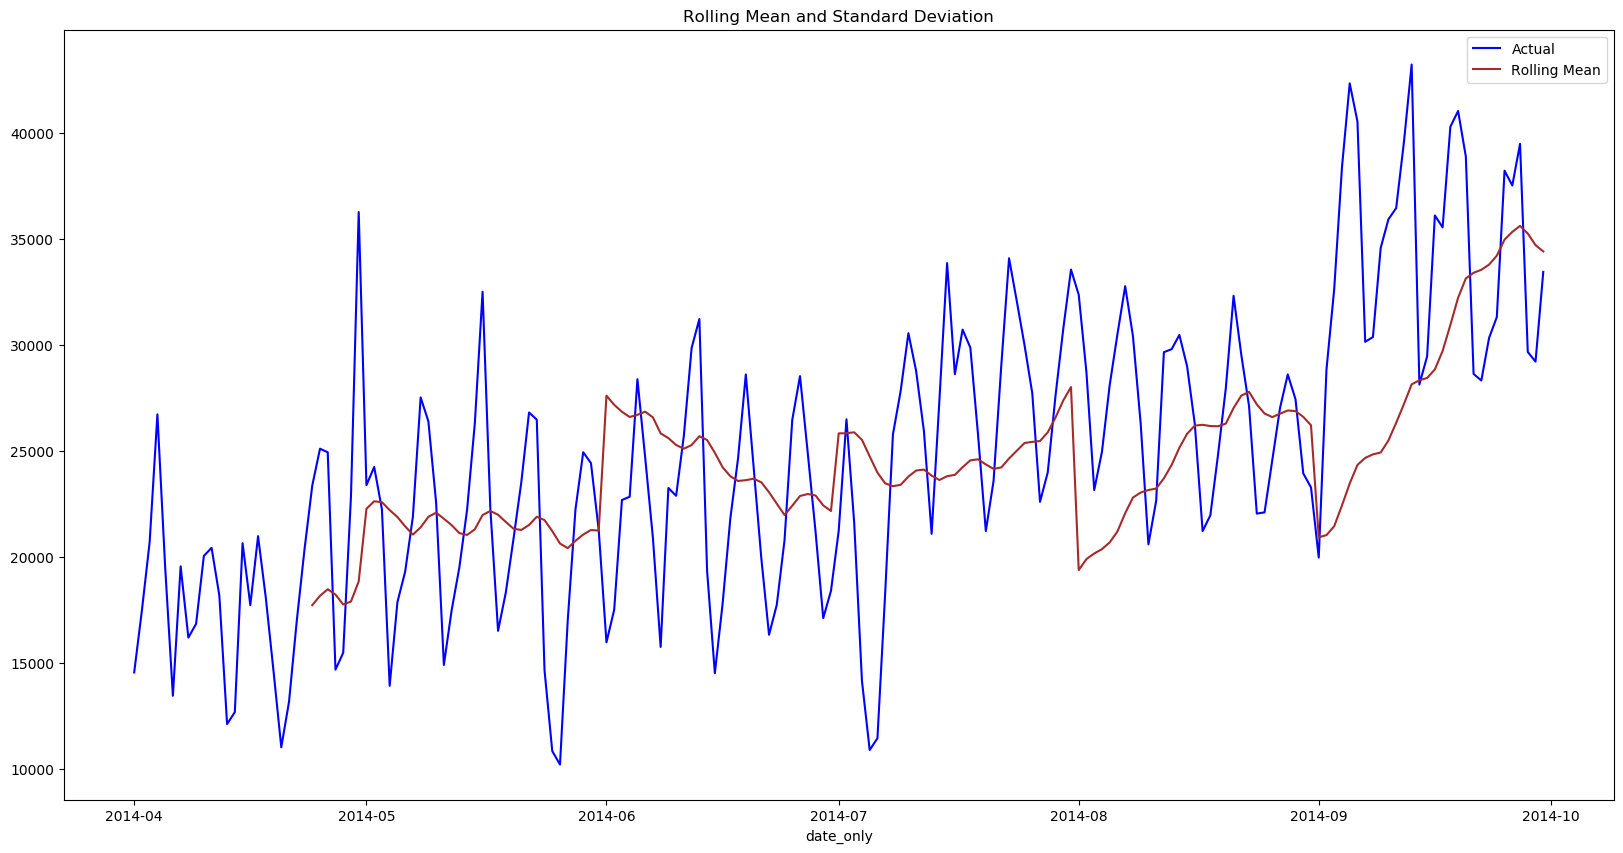

In [39]:
rcParams['figure.figsize']=(20,10)
rolmean = uber_dates['date/time'].rolling(24).mean()
rolstd = uber_dates['date/time'].rolling(24).std()
        
#Plot rolling Statistics
uber_dates['date/time'].plot(kind='line', color = "blue", label = "Actual")
rolmean.plot(kind='line', color = "brown", label = "Rolling Mean")
#.plot(kind='line', color = "black", label = "Rolling Std")
plt.legend(loc = "best")
plt.title("Rolling Mean and Standard Deviation")
plt.show(block = False)

#### Removing Trends

In [40]:
Train_log = np.log(train_ts['date/time'])
valid_log = np.log(test_ts['date/time'])

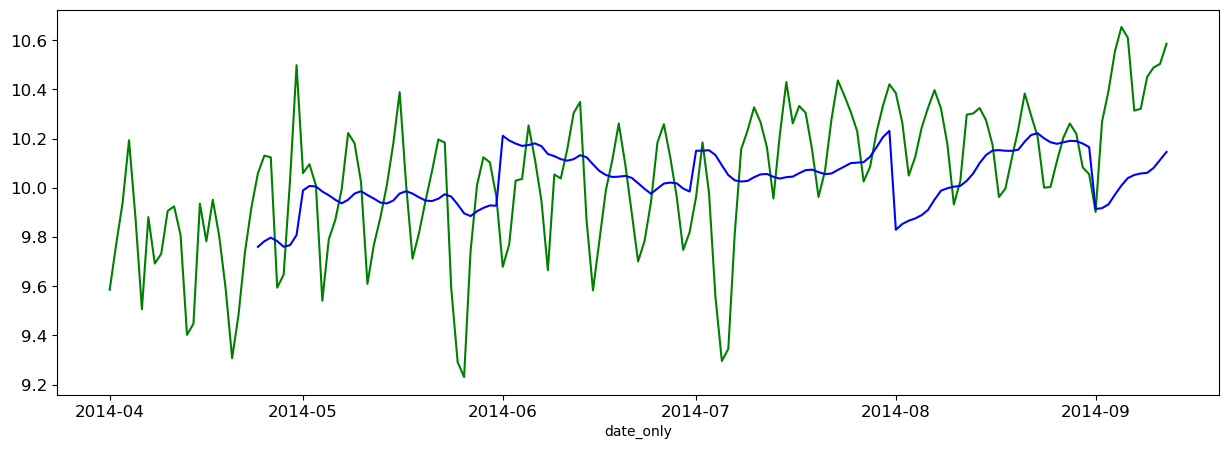

In [41]:
moving_avg = Train_log.rolling(24).mean()
Train_log.plot(kind='line',figsize=(15,8),fontsize=12, color = 'green', label='Training_log')
moving_avg.plot(figsize=(15,5),fontsize=12, color = 'blue', label='Moving_avg')

In [42]:
train_log_moving_diff = Train_log - moving_avg
train_log_moving_diff.dropna(inplace = True)

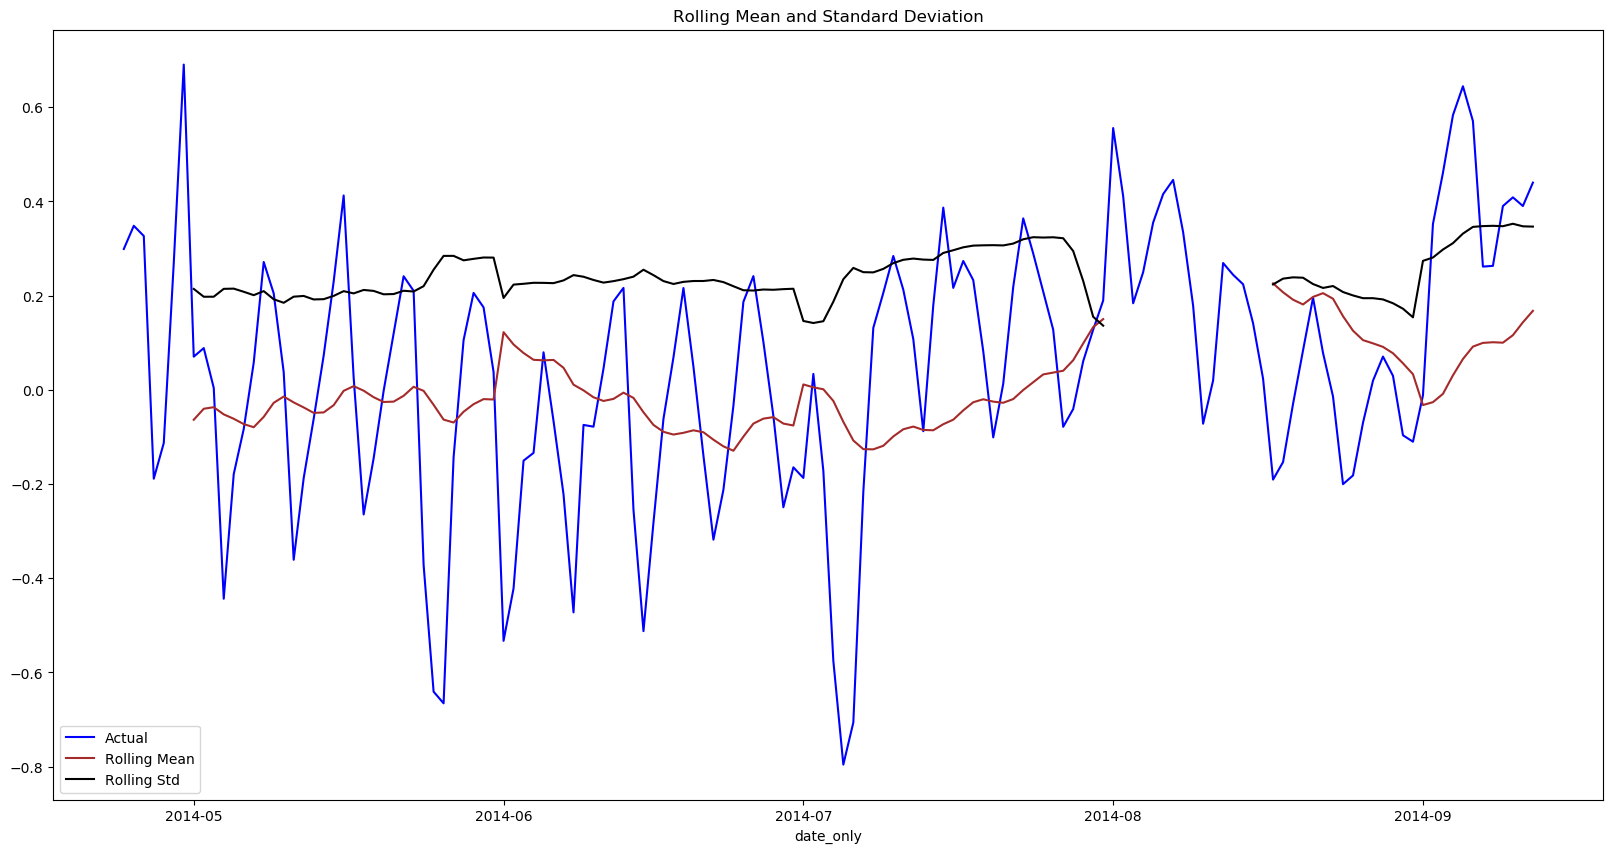

In [43]:
rolmean = train_log_moving_diff.rolling(24).mean()
rolstd = train_log_moving_diff.rolling(24).std()

#Plot rolling Statistics
train_log_moving_diff.plot(kind='line', color = "blue", label = "Actual")
rolmean.plot(kind='line', color = "brown", label = "Rolling Mean")
rolstd.plot(kind='line', color = "black", label = "Rolling Std")
plt.legend(loc = "best")
plt.title("Rolling Mean and Standard Deviation")
plt.show(block = False)

#### Differencing can help to make series stable and able to eliminate trend

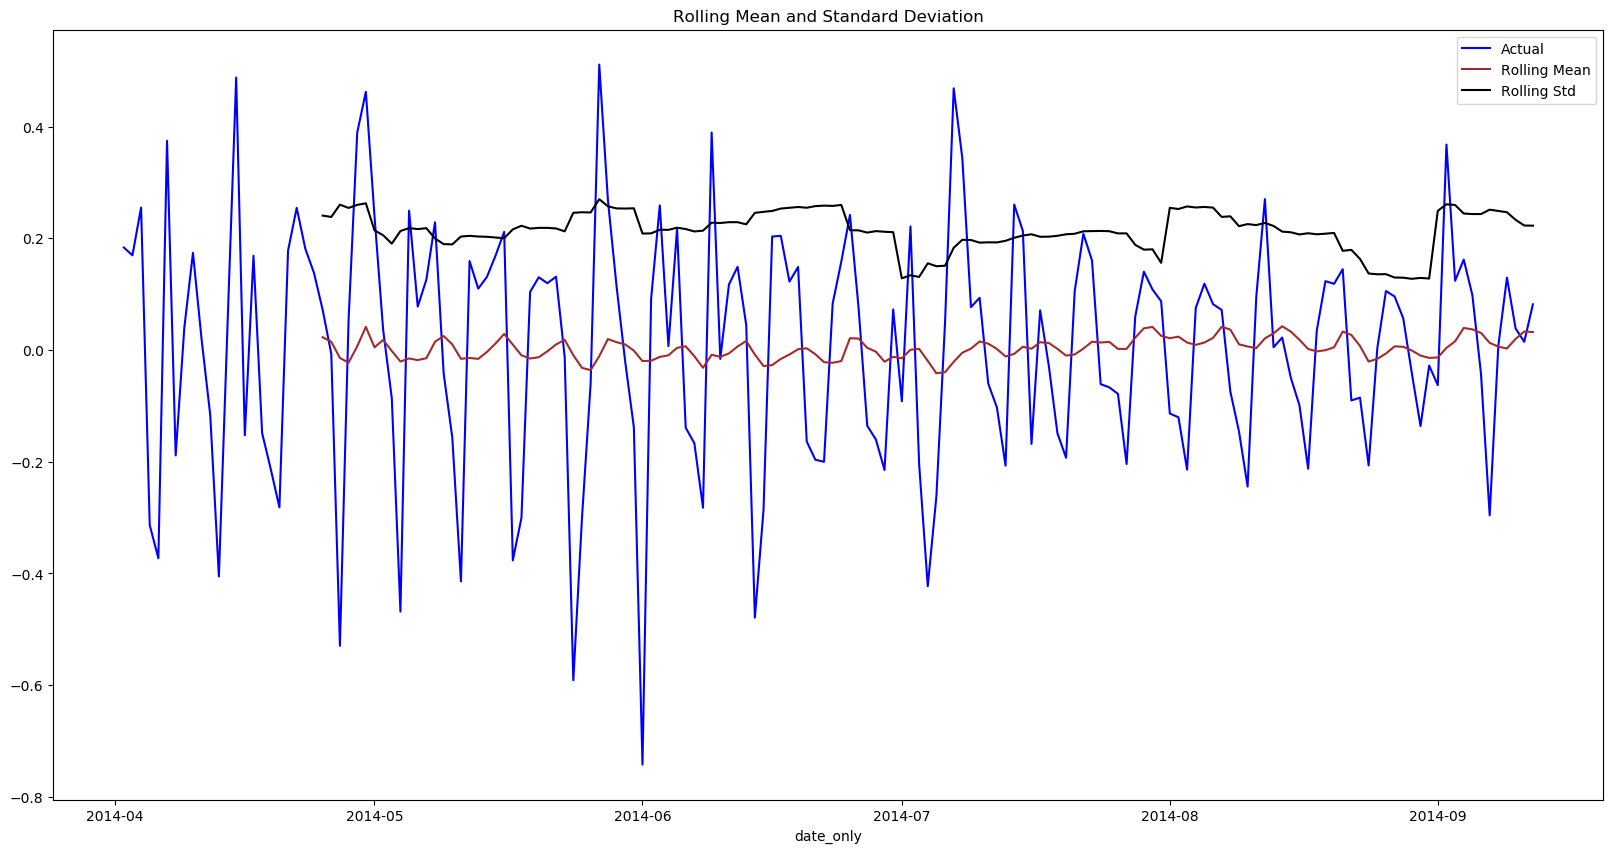

In [44]:
train_log_diff = Train_log - Train_log.shift(1)


rolmean = train_log_diff.rolling(24).mean()
rolstd = train_log_diff.rolling(24).std()

#Plot rolling Statistics
train_log_diff.plot(kind='line', color = "blue", label = "Actual")
rolmean.plot(kind='line', color = "brown", label = "Rolling Mean")
rolstd.plot(kind='line', color = "black", label = "Rolling Std")
plt.legend(loc = "best")
plt.title("Rolling Mean and Standard Deviation")
plt.show(block = False)

#### Removing Seasonailty

In [45]:
decomposition = seasonal_decompose(pd.DataFrame(Train_log)['date/time'].values, freq = 24)
plt.style.use('default')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

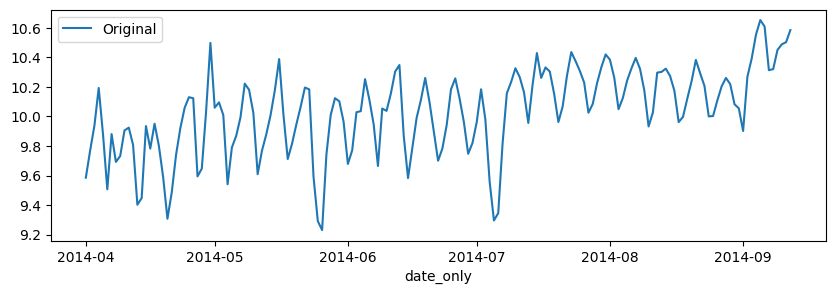

In [46]:
plt.figure(figsize = (10,3))
Train_log.plot(kind='line', label = 'Original')
plt.legend(loc = 'best')

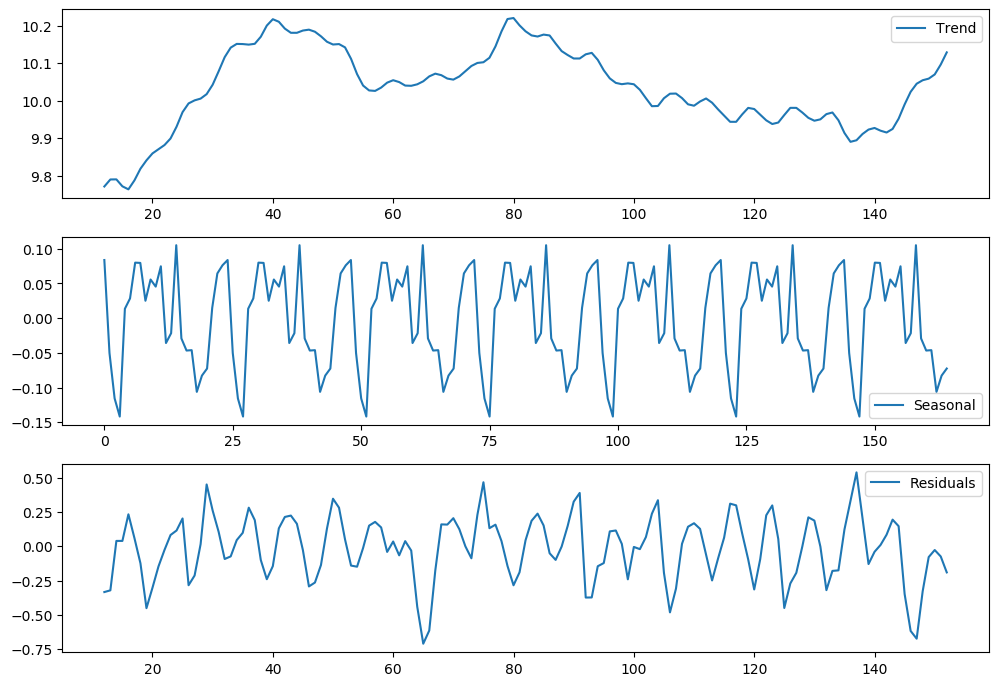

In [47]:
plt.figure(figsize = (10,9))
plt.subplot(411)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

#### Checking stationarity of residuals

In [48]:
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = Train_log.index
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace = True)

In [49]:
from matplotlib.pylab import rcParams

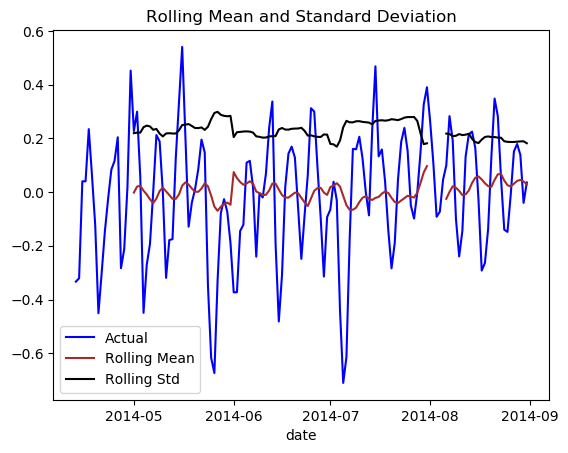

In [50]:
rolmean = train_log_decompose[0].rolling(24).mean()
rolstd = train_log_decompose[0].rolling(24).std()

#Plot rolling Statistics
train_log_decompose[0].plot(kind='line', color = "blue", label = "Actual")
rolmean.plot(kind='line', color = "brown", label = "Rolling Mean")
rolstd.plot(kind='line', color = "black", label = "Rolling Std")
plt.legend(loc = "best")
plt.title("Rolling Mean and Standard Deviation")
plt.show(block = False)

#### Importing statsmodel

In [51]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(train_log_diff.dropna(), nlags = 25)
lag_pacf = pacf(train_log_diff.dropna(), nlags = 25, method= "ols")

C:\Users\HRISHIKESH\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


#### Autocorrelation Function

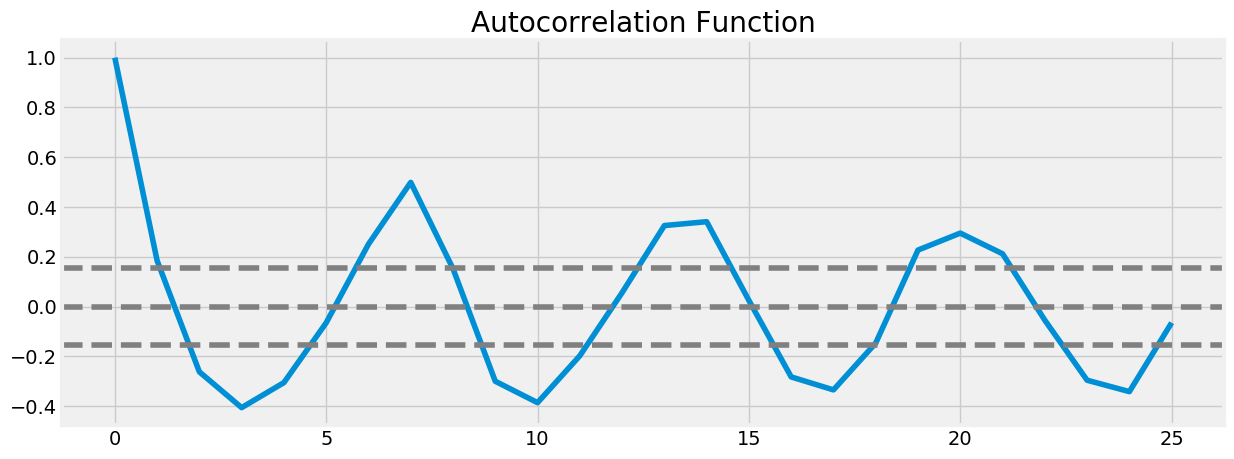

In [52]:
#ACF
plt.figure(figsize = (15,5))
plt.style.use("fivethirtyeight")
plt.plot(lag_acf)
plt.axhline( y = 0, linestyle = "--", color = "gray")
plt.axhline( y= -1.96/np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.axhline(y = 1.96 /np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.title("Autocorrelation Function")
plt.show()

#### Partial Autocorrelation Function

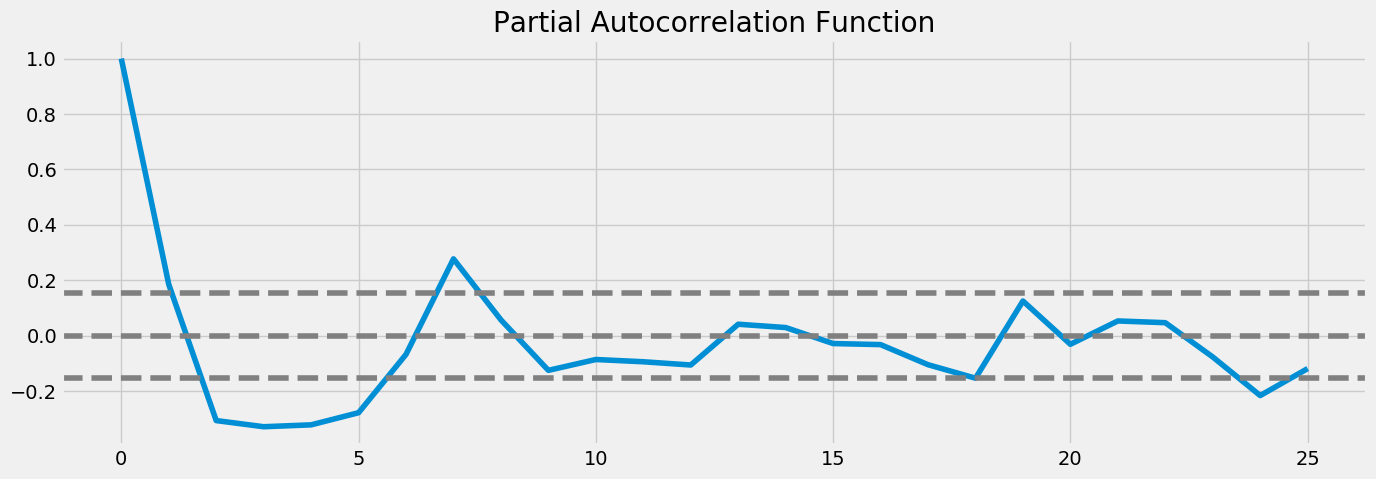

In [53]:
# PACF
plt.figure(figsize = (15,5))
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = "--", color = "gray")
plt.axhline(y = -1.96/np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.axhline( y = 1.96/np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.title("Partial Autocorrelation Function")
plt.show()

### AR Model

C:\Users\HRISHIKESH\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\HRISHIKESH\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


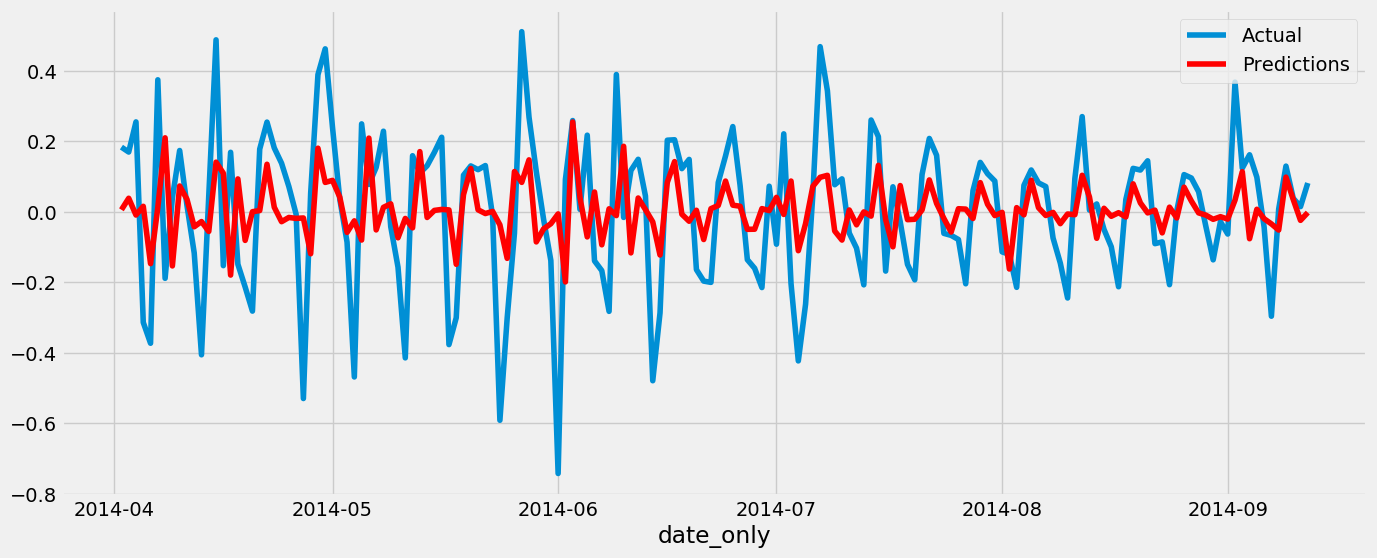

In [54]:
plt.figure(figsize = (15,6))
model = ARIMA(Train_log, order = (2,1,0))  #here q value is zero since it is just AR Model
results_AR = model.fit(disp=-1)
train_log_diff.dropna().plot(kind='line', label = "Actual")
results_AR.fittedvalues.plot(kind='line', color = 'red', label = 'Predictions')
plt.legend(loc = 'upper right')

C:\Users\HRISHIKESH\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\HRISHIKESH\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


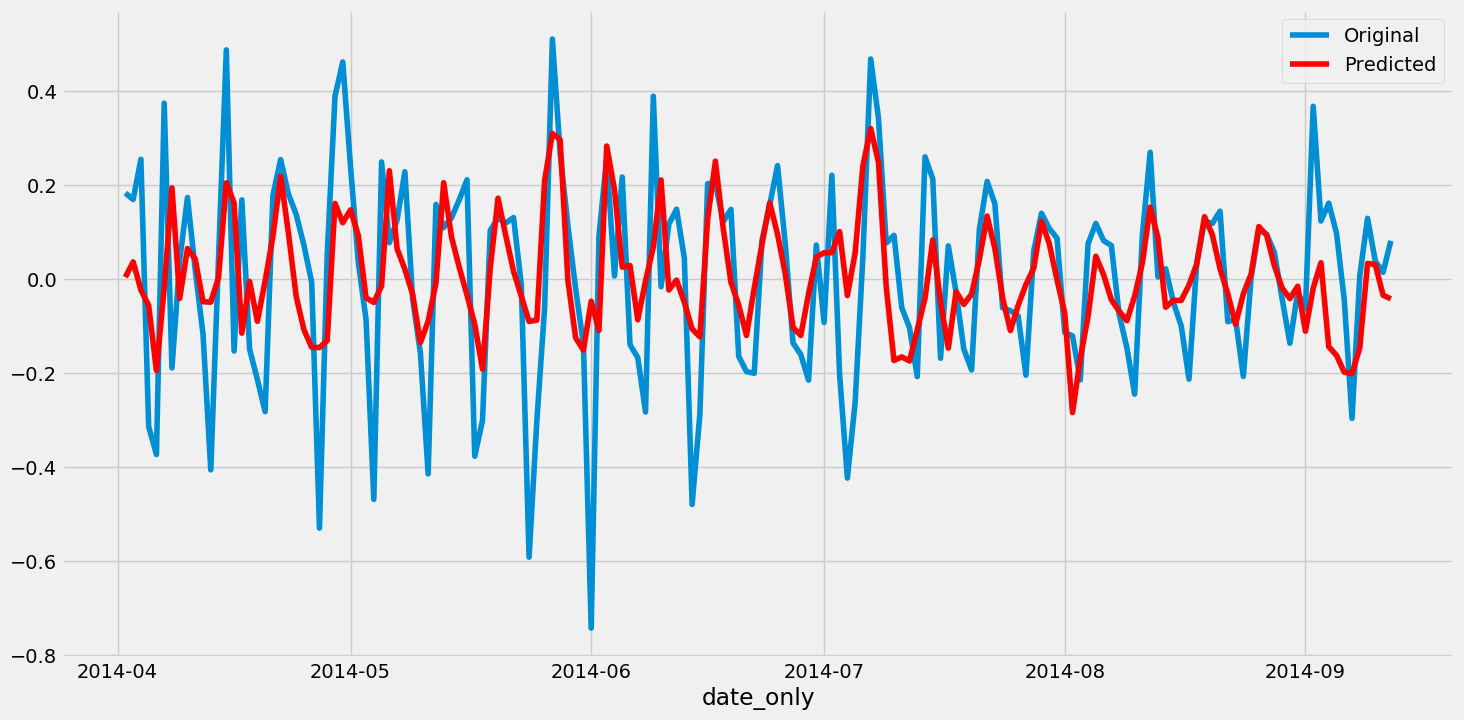

In [55]:
plt.figure(figsize = (16,8))
model = ARIMA(Train_log, order = (2,1,1))
results_ARIMA = model.fit(disp=-1)
train_log_diff.dropna().plot(kind='line',  label='Original')
results_ARIMA.fittedvalues.plot(kind='line', color='red', label='Predicted')
plt.legend(loc='best')
plt.show()

### Function to scale model into original scale


In [56]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['date/time'])[0], index = given_set.index)
    #predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_base)
    
    plt.plot(given_set['date/time'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['date/time']))/given_set.shape[0]))
    plt.show()

In [57]:
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    
    plt.plot(given_set['date/time'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['date/time']))/given_set.shape[0]))
    plt.show()

C:\Users\HRISHIKESH\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


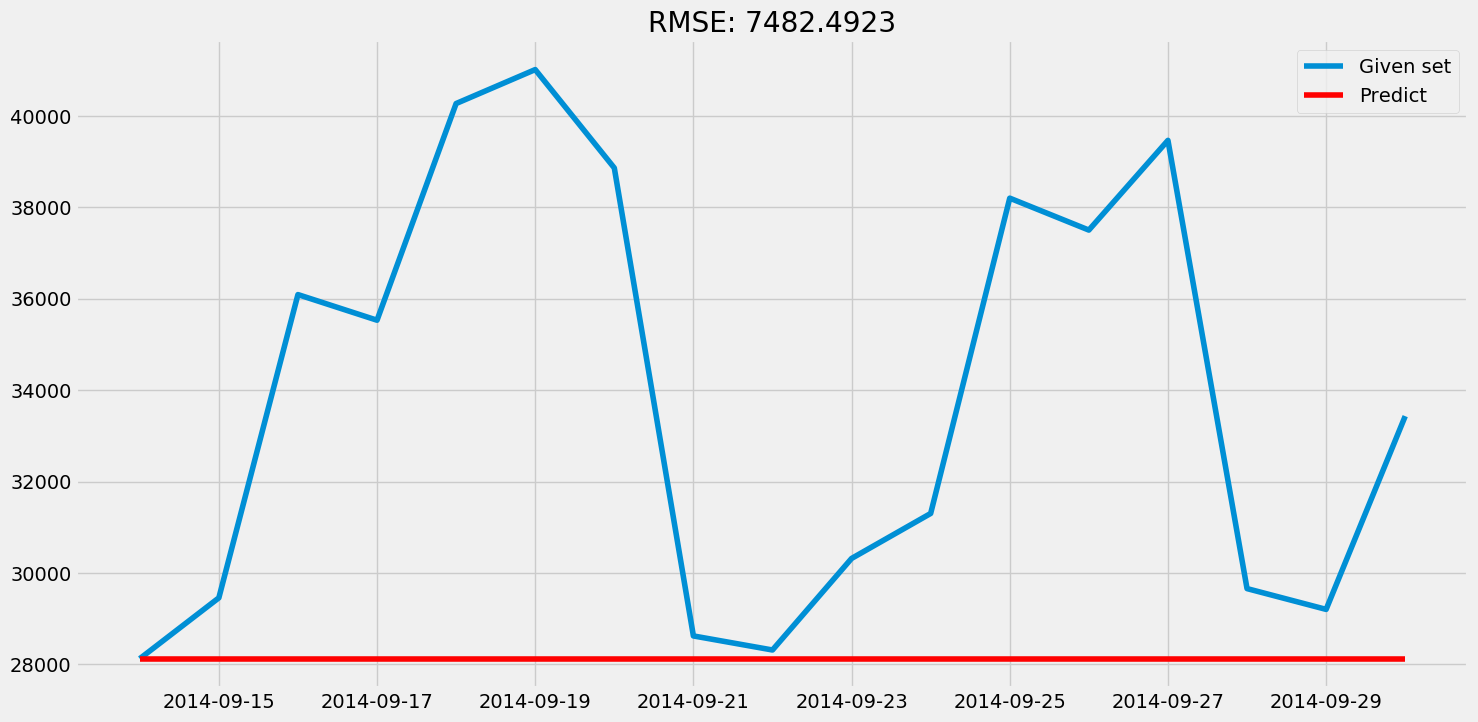

In [58]:
ARIMA_predict_diff=results_ARIMA.predict(len(train_ts))

plt.figure(figsize = (16,8))
check_prediction_diff(ARIMA_predict_diff, test_ts)

In [59]:
ARIMA_predict_diff.shape 

test_ts.shape

(17, 1)

>The huge RMSE value of AR model shows that this model is not suitable for our dataset.

#### Simple Exponential Smoothing

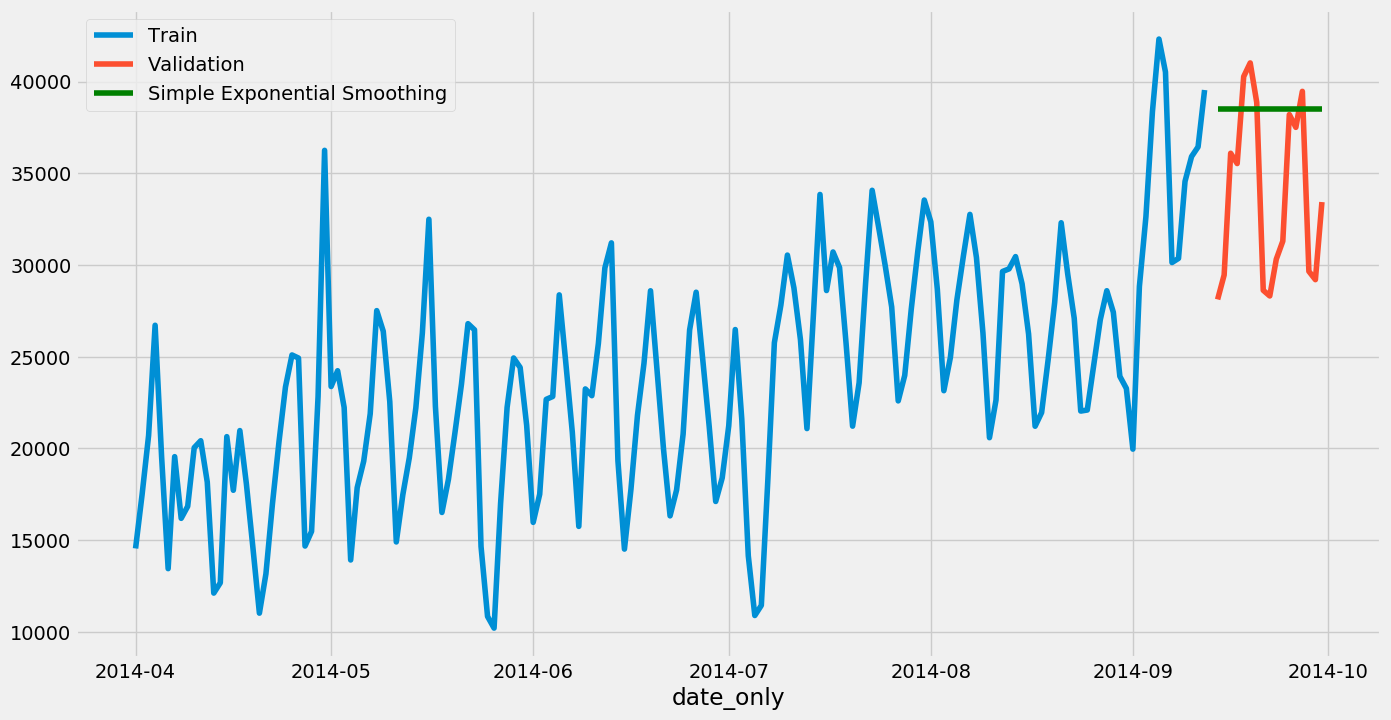

In [60]:
hat_avg = test_ts.copy()
fit2 = SimpleExpSmoothing(np.asarray(train_ts['date/time'])).fit(smoothing_level = 0.7,optimized = False)
hat_avg['SES'] = fit2.forecast(len(test_ts))
plt.figure(figsize =(15,8))
train_ts['date/time'].plot(kind='line',figsize=(15,8), label = 'Train')
test_ts['date/time'].plot(kind='line', label = 'Validation')
plt.plot(hat_avg['SES'], label = 'Simple Exponential Smoothing',color='green')
plt.legend(loc = 'best')


#### RMSE Error for Simple Exponential Smoothing

In [61]:
hat=hat_avg['SES'].values.tolist()
rmse = sqrt(mean_squared_error(test_ts['date/time'],hat))
rmse

6535.679576159164

#### Moving Average Forecast with 10 obeservation

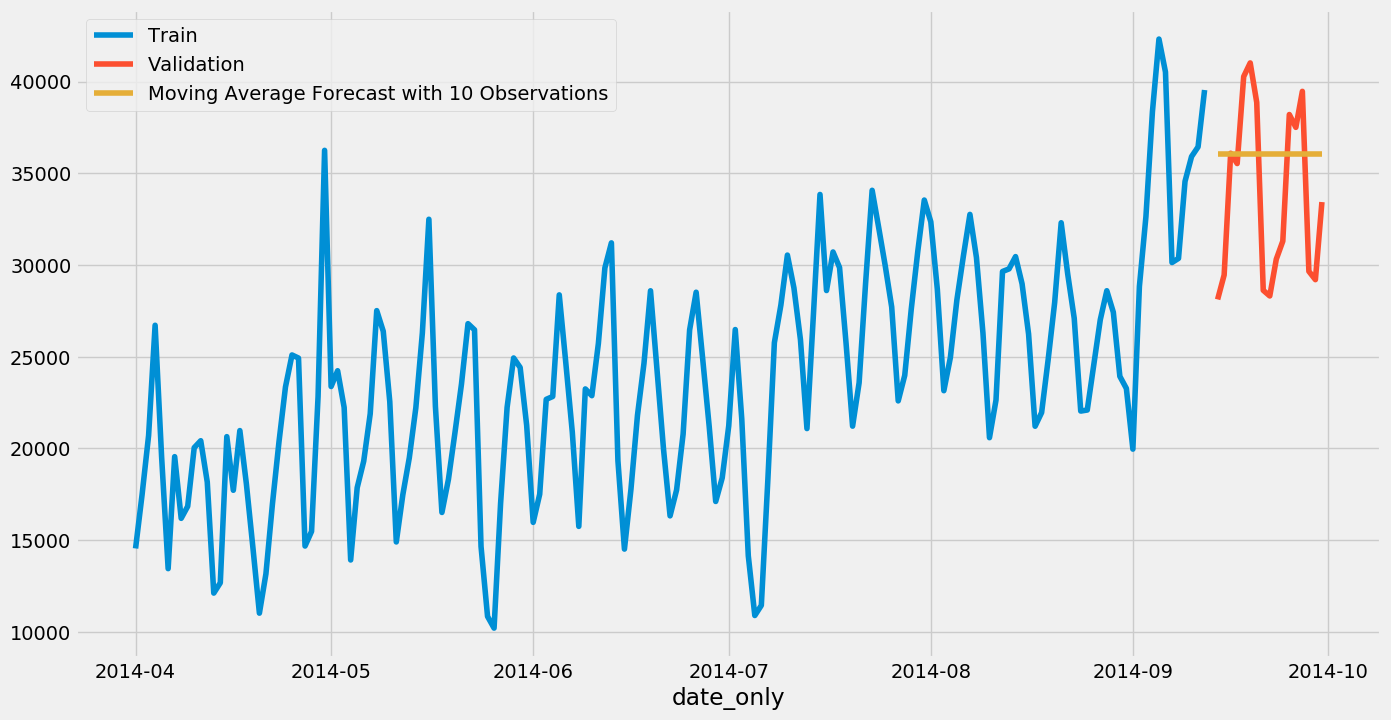

In [62]:
hat_avg = test_ts.copy()
hat_avg['moving_average_forecast'] = train_ts['date/time'].rolling(10).mean().iloc[-1]
plt.figure(figsize = (15,5))
train_ts['date/time'].plot(kind='line',figsize=(15,8), label = 'Train')
test_ts['date/time'].plot(kind='line', label = 'Validation')
plt.plot(hat_avg['moving_average_forecast'], label = 'Moving Average Forecast with 10 Observations')
plt.legend(loc = 'best')
plt.show()

#### Moving Average Forecast with 20 obeservation

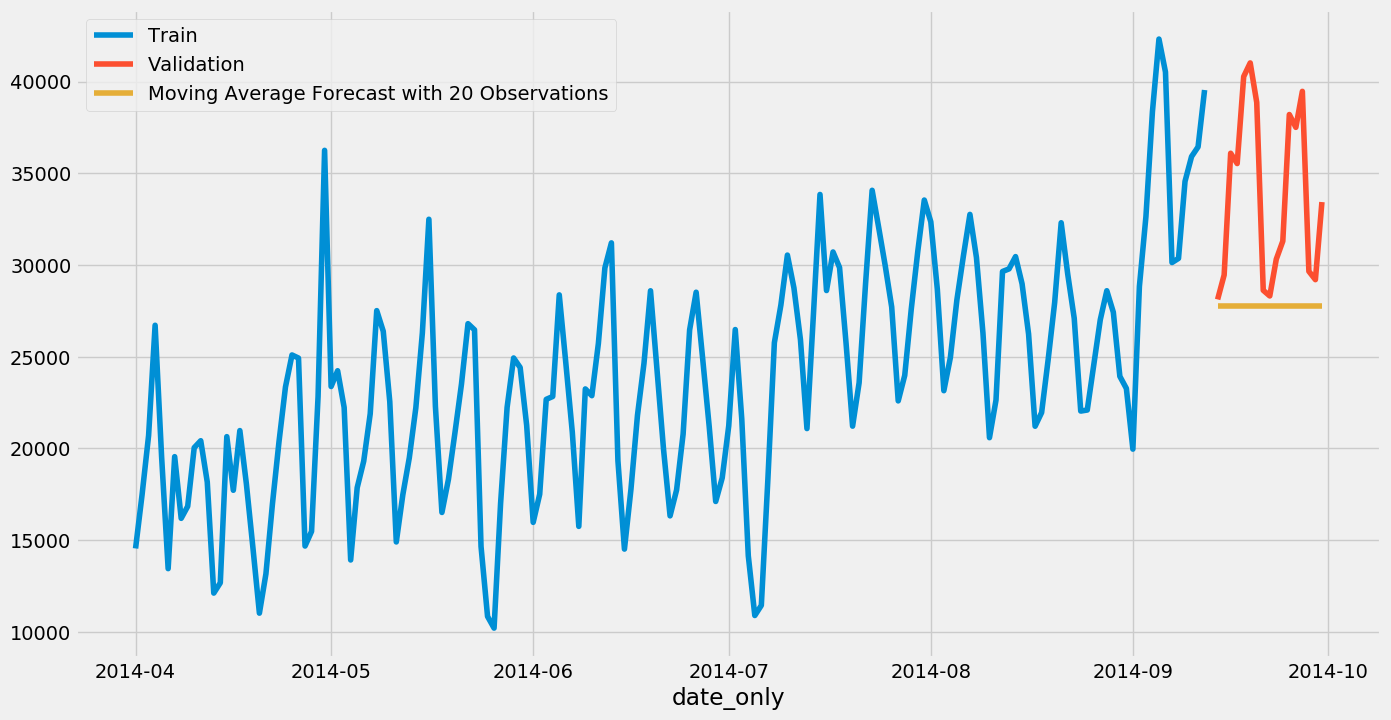

In [63]:
hat_avg = test_ts.copy()
hat_avg['moving_average_forecast'] = train_ts['date/time'].rolling(20).mean().iloc[-1]
plt.figure(figsize = (15,5))
train_ts['date/time'].plot(kind='line',figsize=(15,8), label = 'Train')
test_ts['date/time'].plot(kind='line', label = 'Validation')
plt.plot(hat_avg['moving_average_forecast'],label = 'Moving Average Forecast with 20 Observations')
plt.legend(loc = 'best')
plt.show()

#### Moving Average Forecast with 50 obeservation

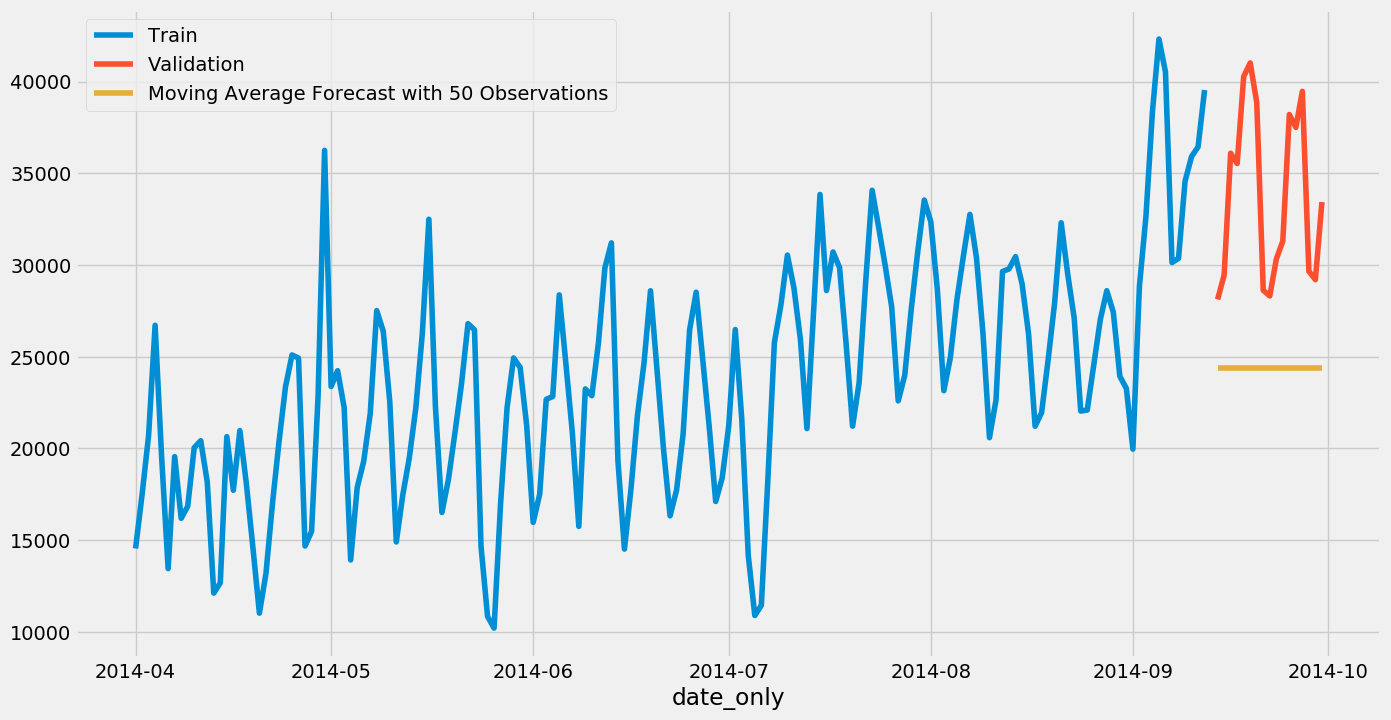

In [64]:
hat_avg = test_ts.copy()
hat_avg['moving_average_forecast'] = train_ts['date/time'].rolling(50).mean().iloc[-1]
plt.figure(figsize = (15,5))
train_ts['date/time'].plot(kind='line',figsize=(15,8), label = 'Train')
test_ts['date/time'].plot(kind='line', label = 'Validation')
plt.plot(hat_avg['moving_average_forecast'], label = "Moving Average Forecast with 50 Observations")
plt.legend(loc = 'best')
plt.show()

#### Root mean Squared Error

In [65]:
rmse = sqrt(mean_squared_error(test_ts['date/time'], hat_avg['moving_average_forecast']))
rmse

10512.398027427367

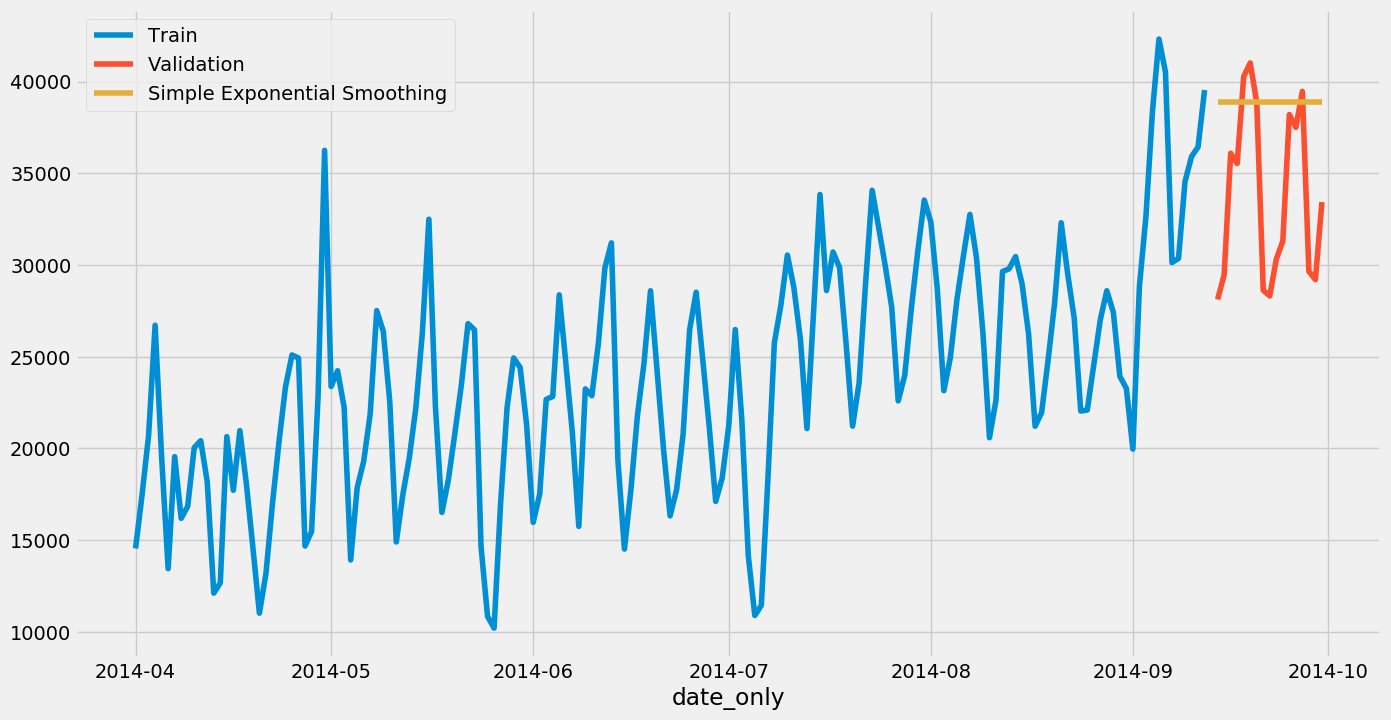

In [66]:
hat = test_ts.copy()
fit2 = SimpleExpSmoothing(np.asarray(train_ts['date/time'])).fit(smoothing_level = 0.8,optimized = False)
hat['SES'] = fit2.forecast(len(test_ts))
plt.figure(figsize =(15,8))
train_ts['date/time'].plot(kind='line',figsize=(15,8), label = 'Train')
test_ts['date/time'].plot(kind='line', label = 'Validation')
plt.plot(hat['SES'], label = 'Simple Exponential Smoothing')
plt.legend(loc = 'best')

> Simple Exponential Smoothing is not the right model for our dataset

### SARIMAX

In [67]:
def day_series_creator(dataframe):
    
    # Grouping by Date/Time to calculate number of trips
    day_df = pd.Series(dataframe.groupby(['date/time']).size())
    # setting Date/Time as index
    day_df.index = pd.DatetimeIndex(day_df.index)
    # Resampling to daily trips
    day_df = day_df.resample('1D').apply(np.sum)
    
    return day_df

In [68]:
day_df_2014 = day_series_creator(df)
day_df_2014.head()

date/time
2014-04-01    14546
2014-04-02    17474
2014-04-03    20701
2014-04-04    26714
2014-04-05    19521
Freq: D, dtype: int64

#### Checking trend and autocorrelation

In [69]:
def initial_plots(time_series, num_lag):

    #Original timeseries plot
    plt.figure(1)
    plt.plot(time_series)
    plt.title('Original Uber data across time')
    plt.figure(2)
    plot_acf(time_series, lags = num_lag)
    plt.title('Autocorrelation plot')
    plot_pacf(time_series, lags = num_lag)
    plt.title('Partial autocorrelation plot')
    
    plt.show()

    
#Augmented Dickey-Fuller test for stationarity
#checking p-value
print('p-value: {}'.format(adfuller(day_df_2014)[1]))

p-value: 0.845898082489837


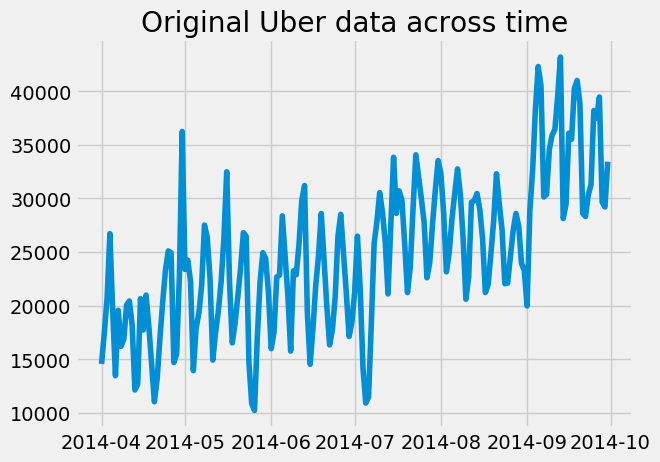

<Figure size 640x480 with 0 Axes>

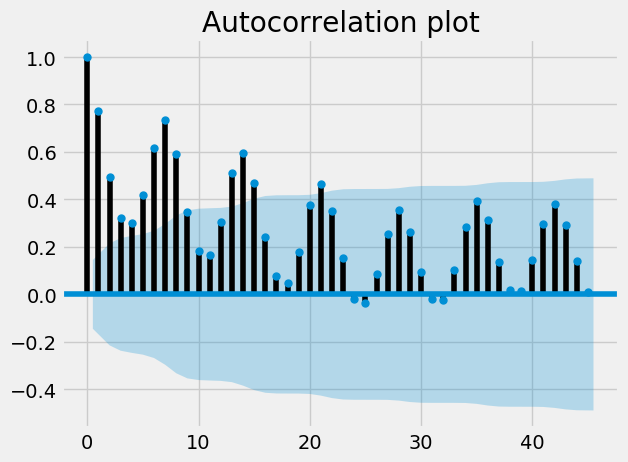

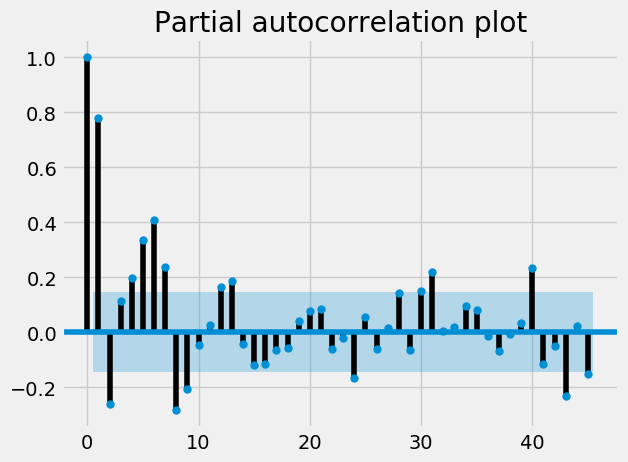

In [70]:
#plotting
initial_plots(day_df_2014, 45)

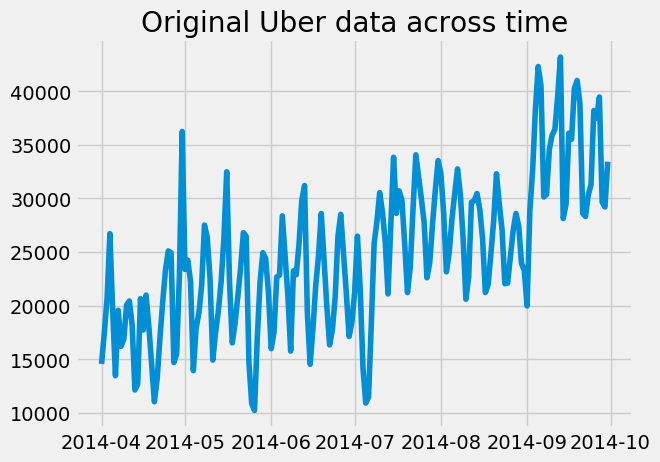

<Figure size 640x480 with 0 Axes>

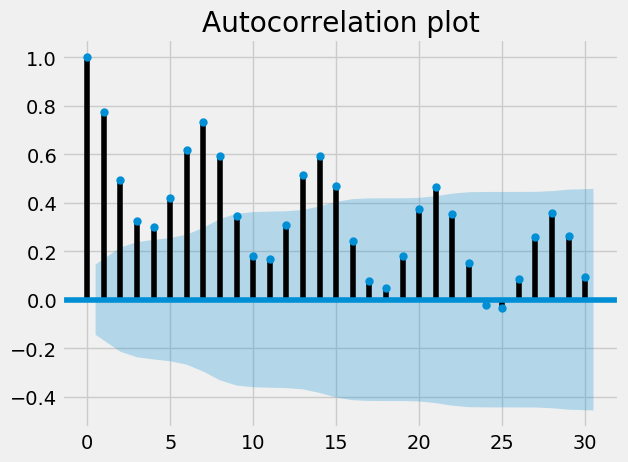

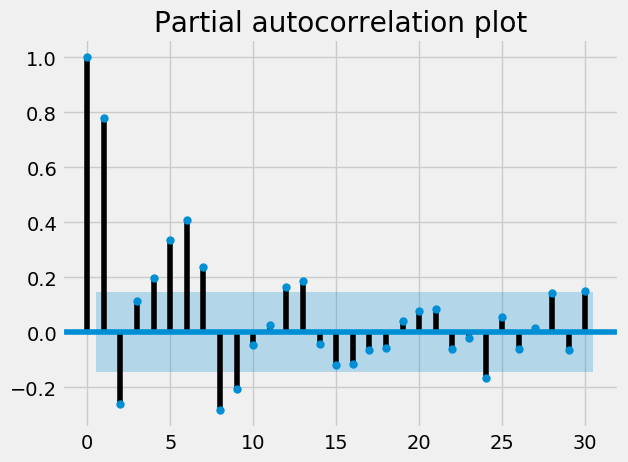

In [71]:
#plotting 30 observation
initial_plots(day_df_2014, 30)

>Looking at the ADF test we see that clearly the time-series is not stationary(p-value>0.05 i.e for a confidence level of 95%), hence differencing is required.

>Before we even analyse the ACF and PACF plots we need to difference and test for stationarity

#### storing differenced series

In [72]:
diff_series = day_df_2014.diff(periods=1)

#Augmented Dickey-Fuller test for stationarity
#checking p-value
print('p-value: {}'.format(adfuller(diff_series.dropna())[1]))

p-value: 1.5163641177434785e-08


In [73]:
round(adfuller(diff_series.dropna())[1],2)

0.0

> Looks like the series is stationary now (as p-value < 0.05, we can assume stationarity with a confidence level of 95%, even higher actually). So a differencing of 1 should be perfect!

> Now lets look at the ACF and PACF plots:

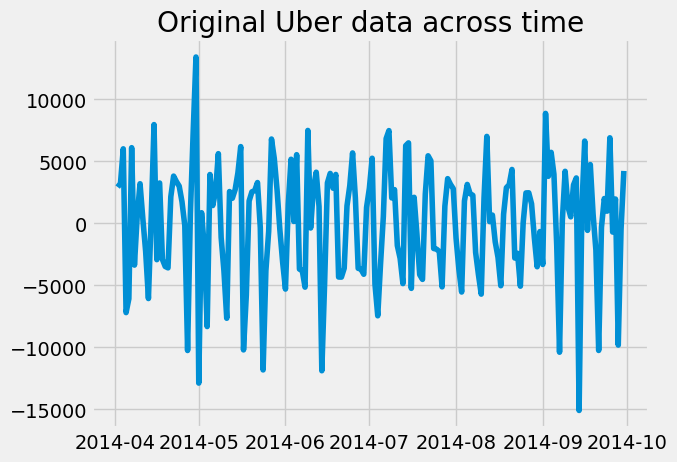

<Figure size 640x480 with 0 Axes>

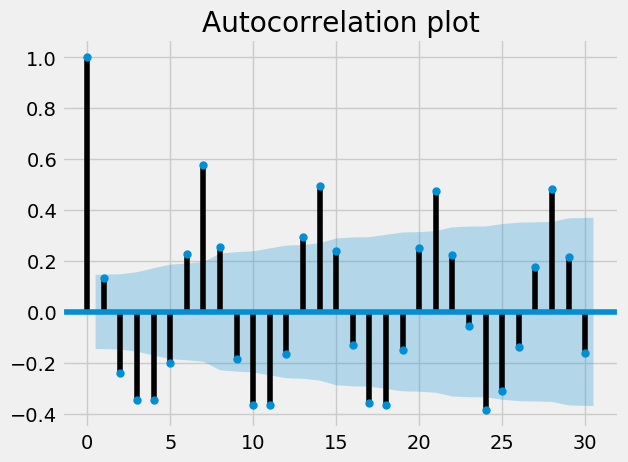

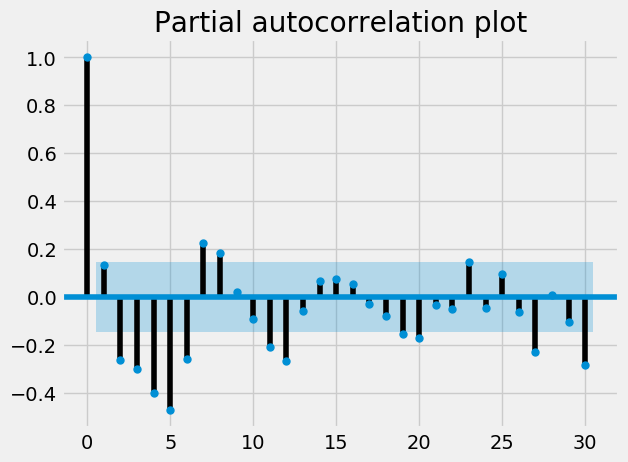

In [74]:
initial_plots(diff_series.dropna(), 30)

>From the ACF and PACF plots we can notice clearly spike at every 7 day interval. And since this appears clearly in the ACF plot this whows a seasonal MA component of 1.

#### Fitting SARIMAX models

>Although at this point the components can be guessed at ARIMA(0,1,0)(0,0,1)[7], we will implement a grid search to find the best fitting values, using RMSE as the deciding factor:

In [75]:
from math import sqrt

# Defining RMSE
def rmse(x,y):
    return sqrt(mean_squared_error(x,y))

In [76]:
# fitting ARIMA model on dataset
def SARIMAX_call(time_series,p_list,d_list,q_list,P_list,D_list,Q_list,s_list,test_period):    
    
    #Splitting into training and testing
    training_ts = time_series[:-test_period]
    
    testing_ts = time_series[len(time_series)-test_period:]
    
    error_evaluation_table = pd.DataFrame(columns = ['p','d','q','P','D','Q','s','AIC','BIC','RMSE'],\
                                                           index = range(len(ns_ar)*len(ns_diff)*len(ns_ma)*len(s_ar)\
                                                                         *len(s_diff)*len(s_ma)*len(s_list)))
    
    count = 0
    
    for p in p_list:
        for d in d_list:
            for q in q_list:
                for P in P_list:
                    for D in D_list:
                        for Q in Q_list:
                            for s in s_list:
                                #fitting the model
                                
                                SARIMAX_model = SARIMAX(training_ts.astype(float),order=(p,d,q),seasonal_order=(P,D,Q,s),enforce_invertibility=False)
                                
                                SARIMAX_model_fit = SARIMAX_model.fit(disp=0)
                                
                                AIC = np.round(SARIMAX_model_fit.aic,2)
                                BIC = np.round(SARIMAX_model_fit.bic,2)
                                
                                predictions = SARIMAX_model_fit.forecast(steps=test_period,typ='levels')
                                
                                RMSE = rmse(testing_ts.values,predictions.values)                                

                                # populating error_evaluation_table
                                error_evaluation_table['p'][count] = p
                                error_evaluation_table['d'][count] = d
                                error_evaluation_table['q'][count] = q
                                error_evaluation_table['P'][count] = P
                                error_evaluation_table['D'][count] = D
                                error_evaluation_table['Q'][count] = Q
                                error_evaluation_table['s'][count] = s
                                error_evaluation_table['AIC'][count] = AIC
                                error_evaluation_table['BIC'][count] = BIC
                                error_evaluation_table['RMSE'][count] = RMSE
                                
                                count+=1 #incrementing count        
    
    #returning the fitted model and values
    return error_evaluation_table

In [77]:
ns_ar = [0,1,2]
ns_diff = [1]
ns_ma = [0,1,2]
s_ar = [0,1]
s_diff = [0,1] 
s_ma = [1,2]
s_list = [7]

In [78]:
# Syntax
# SARIMAX_call(time_series,p_list,d_list,q_list,P_list,D_list,Q_list,s_list,test_period):

In [79]:
error_evaluation_table = SARIMAX_call(time_series=day_df_2014, p_list=ns_ar, d_list=ns_diff,\
                                      q_list=ns_ma, P_list=s_ar, D_list=s_diff, Q_list=s_ma,\
                                      s_list=s_list, test_period=30)

C:\Users\HRISHIKESH\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\HRISHIKESH\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\HRISHIKESH\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\HRISHIKESH\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\HRISHIKESH\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. C

#### Printing top 5 lowest RMSE from error table

In [80]:
error_evaluation_table.sort_values(by='RMSE').head()

,p,d,q,P,D,Q,s,AIC,BIC,RMSE
5,0,1,0,1,0,2,7,2903.31,2915.4,5050.59
3,0,1,0,0,1,2,7,2752.78,2761.71,5105.3
7,0,1,0,1,1,2,7,2754.8,2766.7,5136.57
6,0,1,0,1,1,1,7,2754.5,2763.43,5278.11
2,0,1,0,0,1,1,7,2752.71,2758.66,5336.34


Here we notice that ARIMA(0,1,0)(1,0,2)[7] gives the lowest RMSE. However, next best RMSE is of ARIMA(0,1,0)(0,1,2)[7] has lower AIC and BIC scores, which tells us that it fits the data much better than the lowest RMSE ARIMA fit.

Here we can chose the second ARIMA if we want a more robust solution, which can generalize well to other situations as well, however this ensures that we do not get the best RMSE for this testing data.

### Timeseries Forecasting

>Here I will forecast using ARIMA(0,1,0)(0,1,2)[7] as I want the model to fit the data better along with giving me a lower RMSE:

#### Predicting values using the fitted model

In [82]:
def predict(time_series,p,d,q,P,D,Q,s,n_days,conf):
    
    #Splitting into training and testing
    training_ts = time_series[:-n_days]
    
    testing_ts = time_series[len(time_series)-n_days:]
    
    #fitting the model
    SARIMAX_model = SARIMAX(training_ts.astype(float),\
                            order=(p,d,q),\
                            seasonal_order=(P,D,Q,s),\
                            enforce_invertibility=False)
    SARIMAX_model_fit = SARIMAX_model.fit(disp=0)
    
    #Predicting
    SARIMAX_prediction = pd.DataFrame(SARIMAX_model_fit.forecast(steps=n_days,alpha=(1-conf)).values,\
                          columns=['Prediction'])
    SARIMAX_prediction.index = pd.date_range(training_ts.index.max()+timedelta(days=1),periods=n_days)
    
    #Plotting
    plt.figure(4)
    plt.title('Plot of original data and predicted values using the ARIMA model')
    plt.xlabel('Time')
    plt.ylabel('Number of Trips')
    plt.plot(time_series[1:],'k-', label='Original data')
    plt.plot(SARIMAX_prediction,'b--', label='Next {} days predicted values'.format(n_days))
    plt.legend()
    plt.show()
    
    #Returning predicitons
    return SARIMAX_prediction

#### Predicting the values and builing an 80% confidence interval

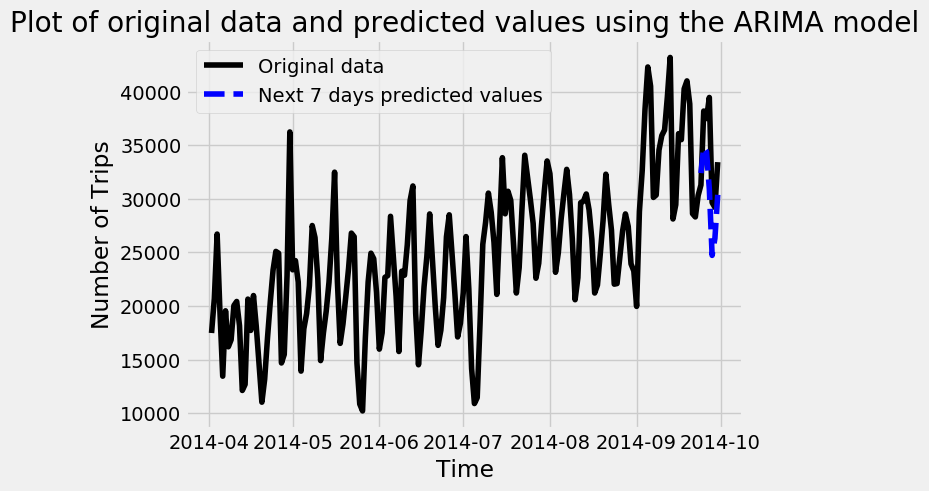

In [83]:
prediction = predict(day_df_2014,0,1,0,0,1,2,7,7,0.80)

>Thus using this simple classical Seasonal ARIMA model we can utilize the forecasted data to plan and alter our marketing strategy for the upcoming week(or any timeframe upon which predictions are to be made) in any location.

### ANN Analysis

>The df uber_count is the grouping of the above dataset on hourly basis with time stamp of both date and time.

>This df is used mostly for ANN analysis.`

In [85]:
uber_count=df.groupby(pd.Grouper(key='date')).count()
uber_count= uber_count.drop(columns = ['date_only'])
print(uber_count.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260093 entries, 2014-04-01 00:11:00 to 2014-09-30 03:26:00
Data columns (total 1 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   date/time  260093 non-null  int64
dtypes: int64(1)
memory usage: 4.0 MB
None


#### calculating 90% of data

In [86]:
round(0.9*len(uber_count))

234084

In [87]:
train = uber_count[:][:234084]             #90% of 260093
test = uber_count[:][234085:]

In [88]:
train.tail()

,date/time
date,
2014-09-24 09:50:00,16
2014-09-24 09:52:00,24
2014-09-24 09:56:00,15
2014-09-24 09:57:00,23
2014-09-24 09:58:00,21


In [89]:
test.head()

,date/time
date,
2014-09-24 10:00:00,15
2014-09-24 10:04:00,10
2014-09-24 10:05:00,17
2014-09-24 10:06:00,16
2014-09-24 10:08:00,16


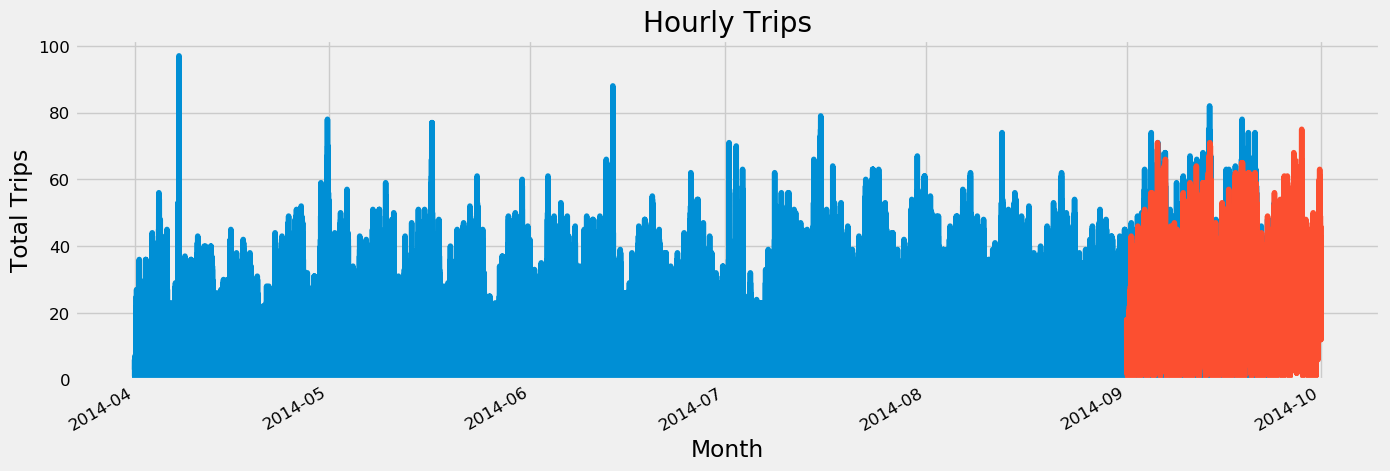

In [90]:
train['date/time'].plot(kind='area',figsize=(15,8), title= 'Hourly Trips', fontsize=14)
test['date/time'].plot(figsize=(15,5), title= 'Hourly Trips', fontsize=12)
plt.ylabel('Total Trips')
plt.xlabel('Month')
plt.show()

In [91]:
def test_stationary(timeseries):
    
    rolmean = timeseries.rolling(24).mean()
    rolstd = timeseries.rolling(24).std()
    
    
    #Plot rolling Statistics
    act = plt.plot(timeseries, color = "blue", label = "Actual")
    mean = plt.plot(rolmean, color = "brown", label = "Rolling Mean")
    std = plt.plot(rolstd, color = "black", label = "Rolling Std")
    plt.legend(loc = "best")
    plt.title("Rolling Mean and Standard Deviation")
    plt.show(block = False)

#### Rolling mean and standard deviation

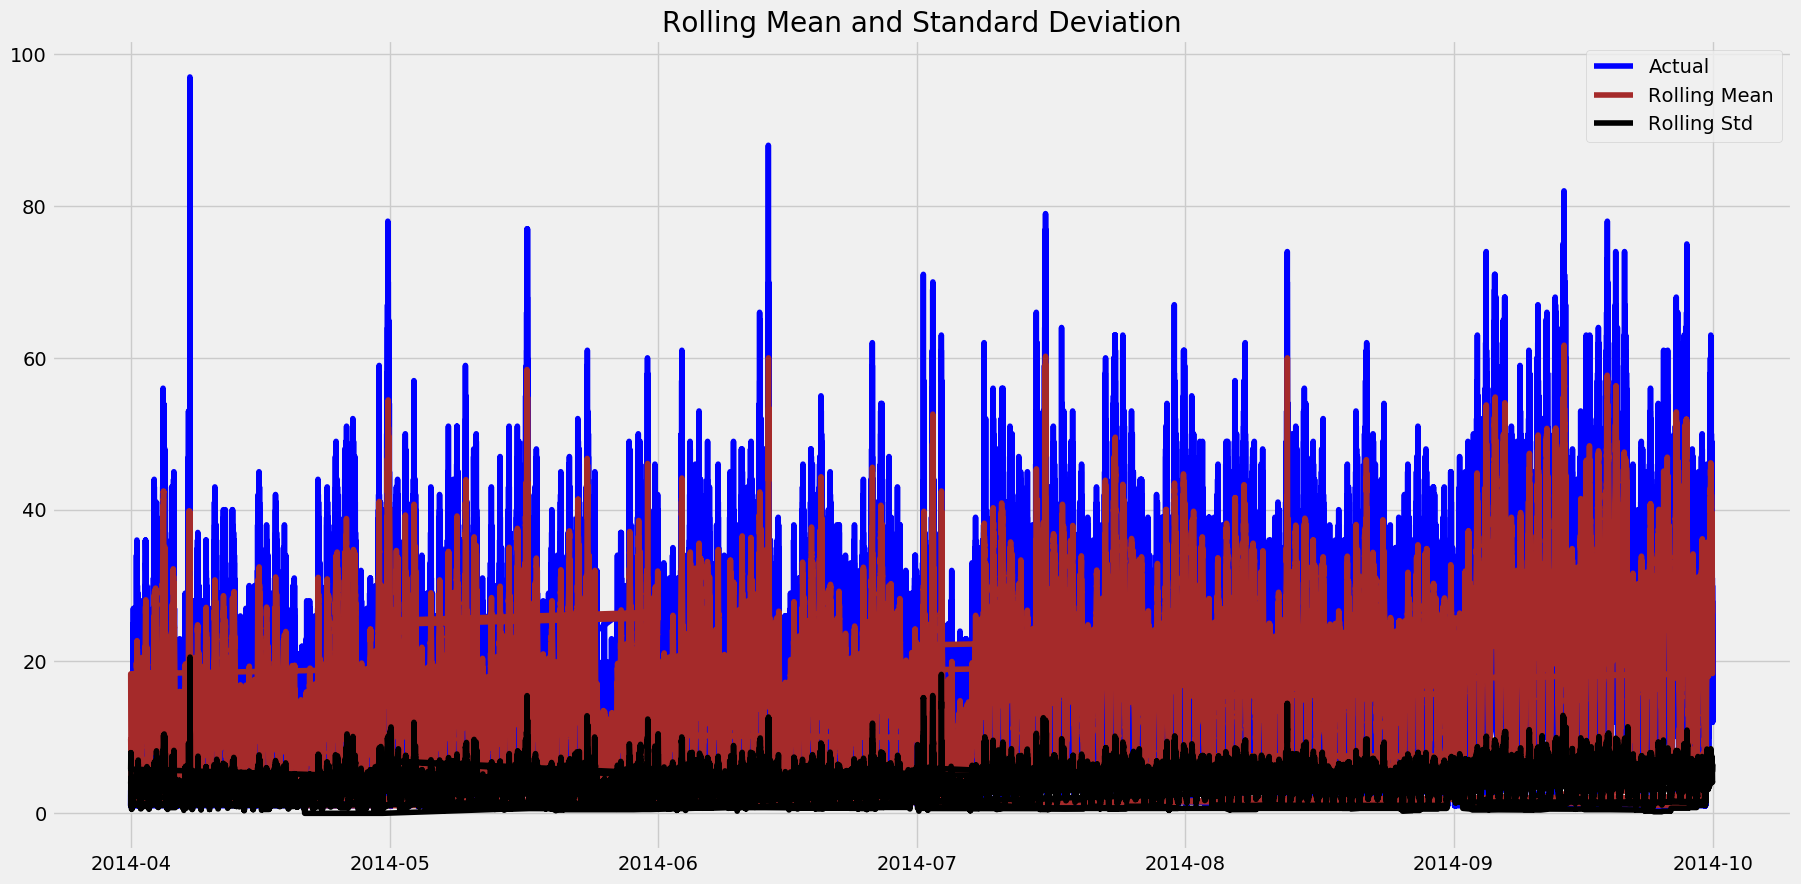

In [92]:
rcParams['figure.figsize']=(20,10)
test_stationary(uber_count['date/time'])

#### Scaling and Splitting dataset

In [93]:
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [94]:
K.clear_session()

#### ANN Model Building

In [95]:
model = Sequential()
model.add(Dense(9, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/20
234083/234083 [==============================] - 163s 697us/step - loss: 0.0027
Epoch 2/20
234083/234083 [==============================] - 174s 745us/step - loss: 0.0028
Epoch 3/20
234083/234083 [==============================] - 171s 730us/step - loss: 0.0028
Epoch 4/20
234083/234083 [==============================] - 165s 707us/step - loss: 0.0028
Epoch 5/20
234083/234083 [==============================] - 173s 740us/step - loss: 0.0028
Epoch 6/20
234083/234083 [==============================] - 168s 719us/step - loss: 0.0028
Epoch 00006: early stopping


#### Model Prediction

In [96]:
y_pred_test_ann = model.predict(X_test)
y_train_pred_ann = model.predict(X_train)
rmse = sqrt(mean_squared_error(y_train,y_train_pred_ann))
print("Train : {:0.3f}".format(rmse))

rmse = sqrt(mean_squared_error(y_test,y_pred_test_ann))
print("Test : {:0.3f}".format(rmse))

model.save('Uber_Data_analysis_ANN')

Train : 0.074
Test : 0.083


#### Loading saved Model

In [97]:
model_ann = load_model('Uber_Data_analysis_ANN')

#### ANN's Prediction

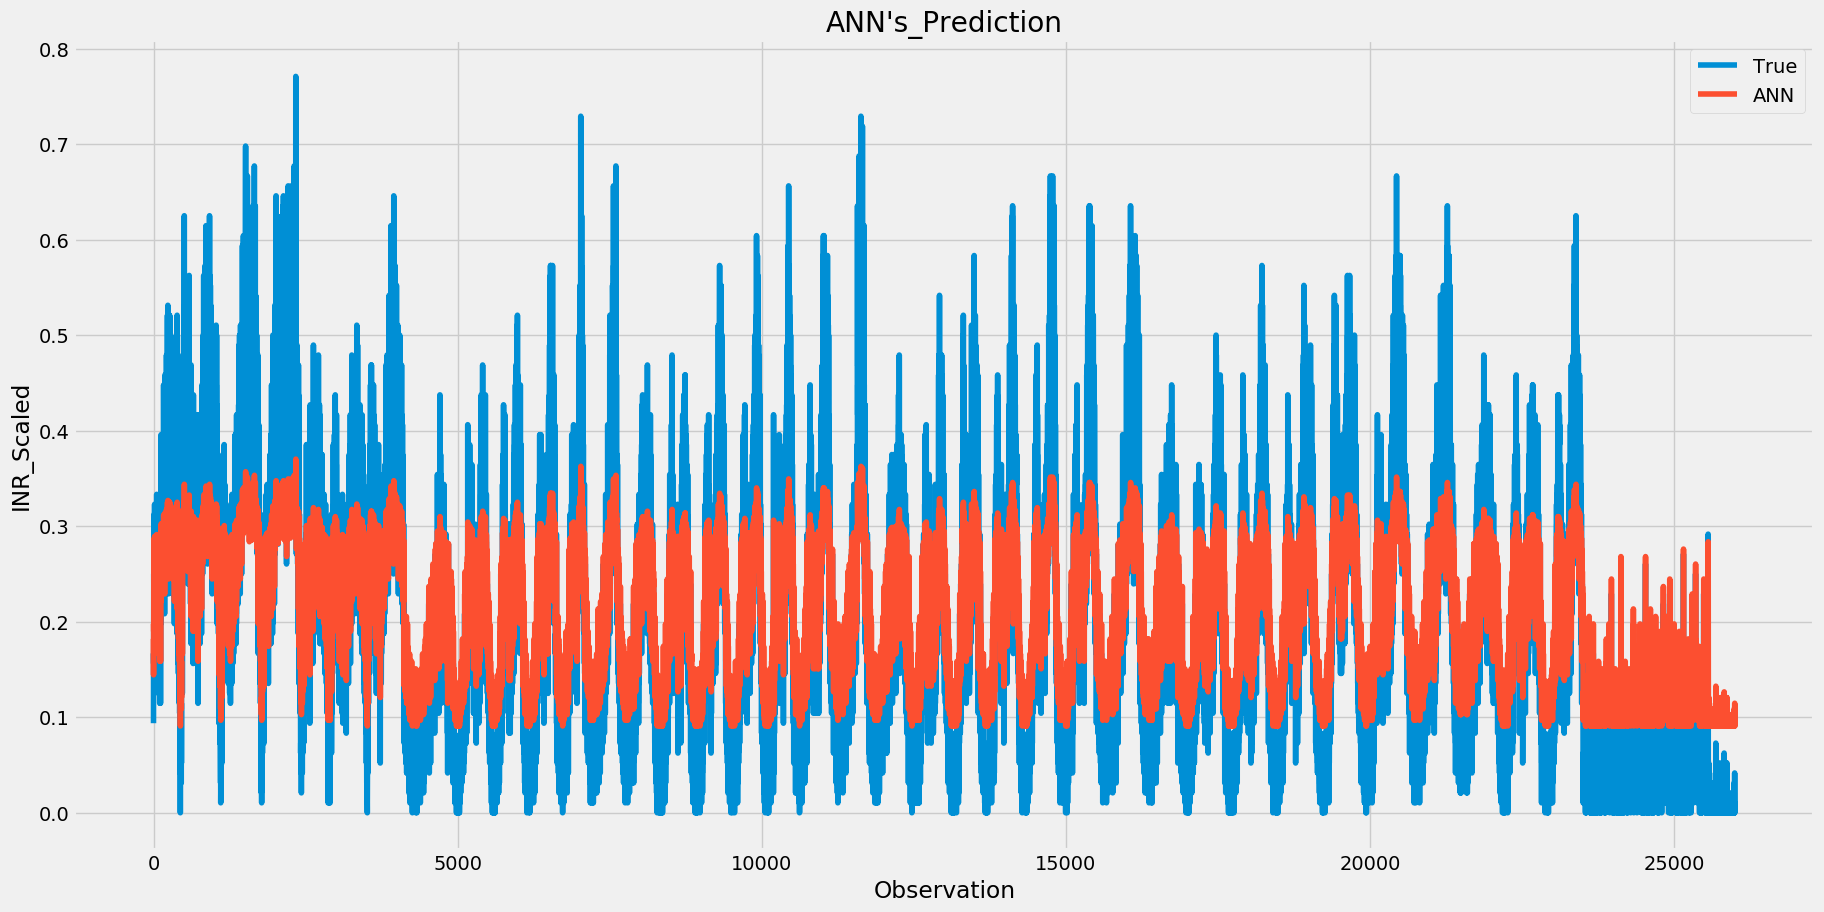

In [98]:
y_pred_test_ANN = model_ann.predict(X_test)
plt.plot(y_test, label='True')
plt.plot(y_pred_test_ANN, label='ANN')
plt.title("ANN's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

#### Accuracy Score using Sklearn metrics

In [99]:
from sklearn import metrics
acc=metrics.r2_score(y_test,y_pred_test_ann)
print("Accuracy Score of Model: ",round(acc*100,2),'%')

Accuracy Score of Model:  64.28 %


#### Error Score evaluation

In [100]:
score_ann= model_ann.evaluate(X_test, y_test, batch_size=1)
print('ANN: %f'%score_ann)

26007/26007 [==============================] - 7s 286us/step
ANN: 0.006823


>Error Score for this model is very low, hence ANN model gives good results¶

### Refrences:
https://stackoverflow.com/questions/61153546/addition-subtraction-of-integers-and-integer-arrays-with-timestamp-is-no-longer
https://www.guru99.com/date-time-and-datetime-classes-in-python.html
https://github.com/alan-turing-institute/sktime/issues/346
https://www.kaggle.com/kruthik93/utilizing-arima-to-forecast-uber-s-market-demand
https://towardsdatascience.com/extreme-event-forecasting-with-lstm-autoencoders-297492485037
https://www.kaggle.com/gargshriya/uber-analysis
https://towardsdatascience.com/time-series-in-python-part-3-forecasting-taxi-trips-with-lstms-277afd4f811
https://machinelearningmastery.com/lstm-model-architecture-for-rare-event-time-series-forecasting/

### Thank you :)